## Import data and process data 

In [1]:
# Import the necessary packages. See report on installation commands if these aren't available by default
import IPython
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from statistics import mode
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preview

In [2]:
# Read the dataset into the dataframe  using pandas command
data = pd.read_csv("./diabetic_data.csv")

In [3]:
# Check the size of the dataset 
data.shape

(101766, 50)

In [4]:
#this is how dataset looks columns have been transposed to appear row wise
data.head(5).T

0          1  \
encounter_id                               2278392     149190   
patient_nbr                                8222157   55629189   
race                                     Caucasian  Caucasian   
gender                                      Female     Female   
age                                         [0-10)    [10-20)   
weight                                           ?          ?   
admission_type_id                                6          1   
discharge_disposition_id                        25          1   
admission_source_id                              1          7   
time_in_hospital                                 1          3   
payer_code                                       ?          ?   
medical_specialty         Pediatrics-Endocrinology          ?   
num_lab_procedures                              41         59   
num_procedures                                   0          0   
num_medications                                  1         18   
number_outpatient                                0          0   
number_emergency                                 0          0   
number_inpatient                                 0          0   
diag_1                                      250.83        276   
diag_2                                           ?     250.01   
diag_3                                           ?        255   
number_diagnoses                                 1          9   
max_glu_serum                                 None       None   
A1Cresult                                     None       None   
metformin                                       No         No   
repaglinide                                     No         No   
nateglinide                                     No         No   
chlorpropamide                                  No         No   
glimepiride                                     No         No   
acetohexamide                                   No         No   
glipizide                                       No         No   
glyburide                                       No         No   
tolbutamide                                     No         No   
pioglitazone                                    No         No   
rosiglitazone                                   No         No   
acarbose                                        No         No   
miglitol                                        No         No   
troglitazone                                    No         No   
tolazamide                                      No         No   
examide                                         No         No   
citoglipton                                     No         No   
insulin                                         No         Up   
glyburide-metformin                             No         No   
glipizide-metformin                             No         No   
glimepiride-pioglitazone                        No         No   
metformin-rosiglitazone                         No         No   
metformin-pioglitazone                          No         No   
change                                          No         Ch   
diabetesMed                                     No        Yes   
readmitted                                      NO        >30   

                                        2          3          4  
encounter_id                        64410     500364      16680  
patient_nbr                      86047875   82442376   42519267  
race                      AfricanAmerican  Caucasian  Caucasian  
gender                             Female       Male       Male  
age                               [20-30)    [30-40)    [40-50)  
weight                                  ?          ?          ?  
admission_type_id                       1          1          1  
discharge_disposition_id                1          1          1  
admission_source_id                     7          7          7  
time_in_hospital                        2          2          1  
payer_c

In [5]:
# Check the overall information:data typle and null values
data.info()
"""The columns do not contain null values, so recheck the object data type"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

'The columns do not contain null values, so recheck the object data type'

In [6]:
# check object datatypes columns to detect null values
for i in data.columns:
    if data[i].dtype==object:
        d= data[i].value_counts()
        print(pd.DataFrame(data=d))
"""There are no null values in the dataset"""

                  race
Caucasian        76099
AfricanAmerican  19210
?                 2273
Hispanic          2037
Other             1506
Asian              641
                 gender
Female            54708
Male              47055
Unknown/Invalid       3
            age
[70-80)   26068
[60-70)   22483
[50-60)   17256
[80-90)   17197
[40-50)    9685
[30-40)    3775
[90-100)   2793
[20-30)    1657
[10-20)     691
[0-10)      161
           weight
?           98569
[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
    payer_code
?        40256
MC       32439
HM        6274
SP        5007
BC        4655
MD        3532
CP        2533
UN        2448
CM        1937
OG        1033
PO         592
DM         549
CH         146
WC         135
OT          95
MP          79
SI          55
FR           1
                               medical_specialty
?                                  

'There are no null values in the dataset'

In [7]:
# Data profiling of numerical cols
data.describe().transpose()

count          mean           std      min  \
encounter_id              101766.0  1.652016e+08  1.026403e+08  12522.0   
patient_nbr               101766.0  5.433040e+07  3.869636e+07    135.0   
admission_type_id         101766.0  2.024006e+00  1.445403e+00      1.0   
discharge_disposition_id  101766.0  3.715642e+00  5.280166e+00      1.0   
admission_source_id       101766.0  5.754437e+00  4.064081e+00      1.0   
time_in_hospital          101766.0  4.395987e+00  2.985108e+00      1.0   
num_lab_procedures        101766.0  4.309564e+01  1.967436e+01      1.0   
num_procedures            101766.0  1.339730e+00  1.705807e+00      0.0   
num_medications           101766.0  1.602184e+01  8.127566e+00      1.0   
number_outpatient         101766.0  3.693572e-01  1.267265e+00      0.0   
number_emergency          101766.0  1.978362e-01  9.304723e-01      0.0   
number_inpatient          101766.0  6.355659e-01  1.262863e+00      0.0   
number_diagnoses          101766.0  7.422607e+00  1.933600e+00      1.0   

                                 25%          50%           75%          max  
encounter_id              84961194.0  152388987.0  2.302709e+08  443867222.0  
patient_nbr               23413221.0   45505143.0  8.754595e+07  189502619.0  
admission_type_id                1.0          1.0  3.000000e+00          8.0  
discharge_disposition_id         1.0          1.0  4.000000e+00         28.0  
admission_source_id              1.0          7.0  7.000000e+00         25.0  
time_in_hospital                 2.0          4.0  6.000000e+00         14.0  
num_lab_procedures              31.0         44.0  5.700000e+01        132.0  
num_procedures                   0.0          1.0  2.000000e+00          6.0  
num_medications                 10.0         15.0  2.000000e+01         81.0  
number_outpatient                0.0          0.0  0.000000e+00         42.0  
number_emergency                 0.0          0.0  0.000000e+00         76.0  
number_inpatient                 0.0          0.0  1.000000e+00         21.0  
number_diagnoses                 6.0          8.0  9.000000e+00         16.0

 """description: 
         1) encounter_id and patient_nbr need to be cleaned;
         2) the maximum days for stay in hospital is 14 days
         3) average num_lab_procedures=43
         4) average num_medications=16
         5) average num_diagnoses=7.4 """

## Attribute Plotting 

### Readmission Rate Count 

<AxesSubplot:title={'center':'Readmission_count'}>

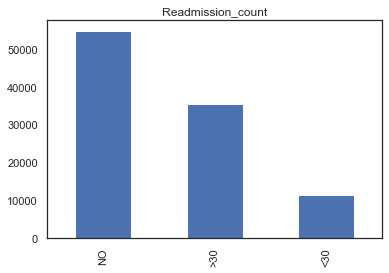

In [134]:
#target variable plot shows 3 kinds of values
target_count=data['readmitted'].value_counts()
target_count.plot(kind='bar', title='Readmission_count')

### Age and Gender Count

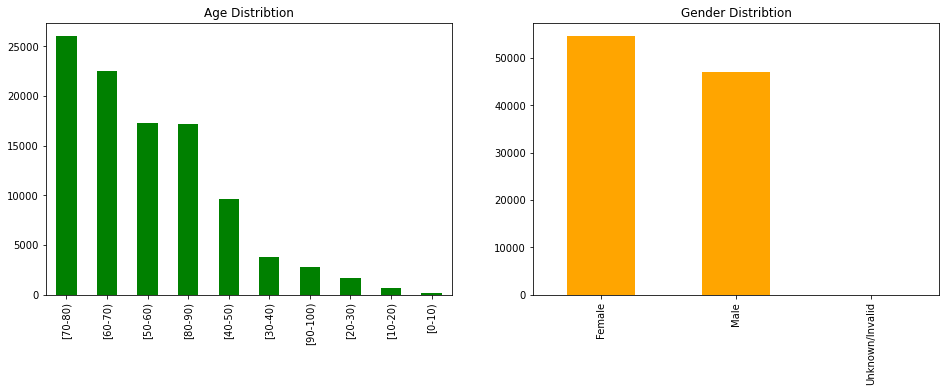

In [9]:
age_count=data["age"].value_counts()
gender_count=data["gender"].value_counts()# Have to deal with unkown/invalid count 
fig,(ax1, ax2)= plt.subplots(1,2,figsize=(16,5))
_ = age_count.plot(kind='bar',title='Age Distribtion',ax=ax1,color='green')
_ = gender_count.plot(kind='bar',title='Gender Distribtion',ax=ax2,color='orange')

### Race and Weight Count 

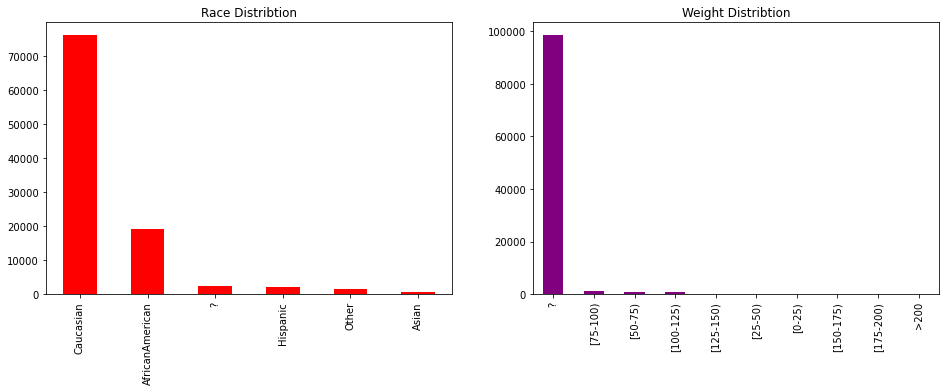

In [10]:
race_count=data["race"].value_counts()
weight_count=data["weight"].value_counts()# Have to deal with unkown/invalid count 
fig,(ax1, ax2)= plt.subplots(1,2,figsize=(16,5))
_ = race_count.plot(kind='bar',title='Race Distribtion',ax=ax1,color='red')# Missing values
_ = weight_count.plot(kind='bar',title='Weight Distribtion',ax=ax2,color='purple')# Missing values 

### Numerical data Distribution 

C:\Users\madara\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


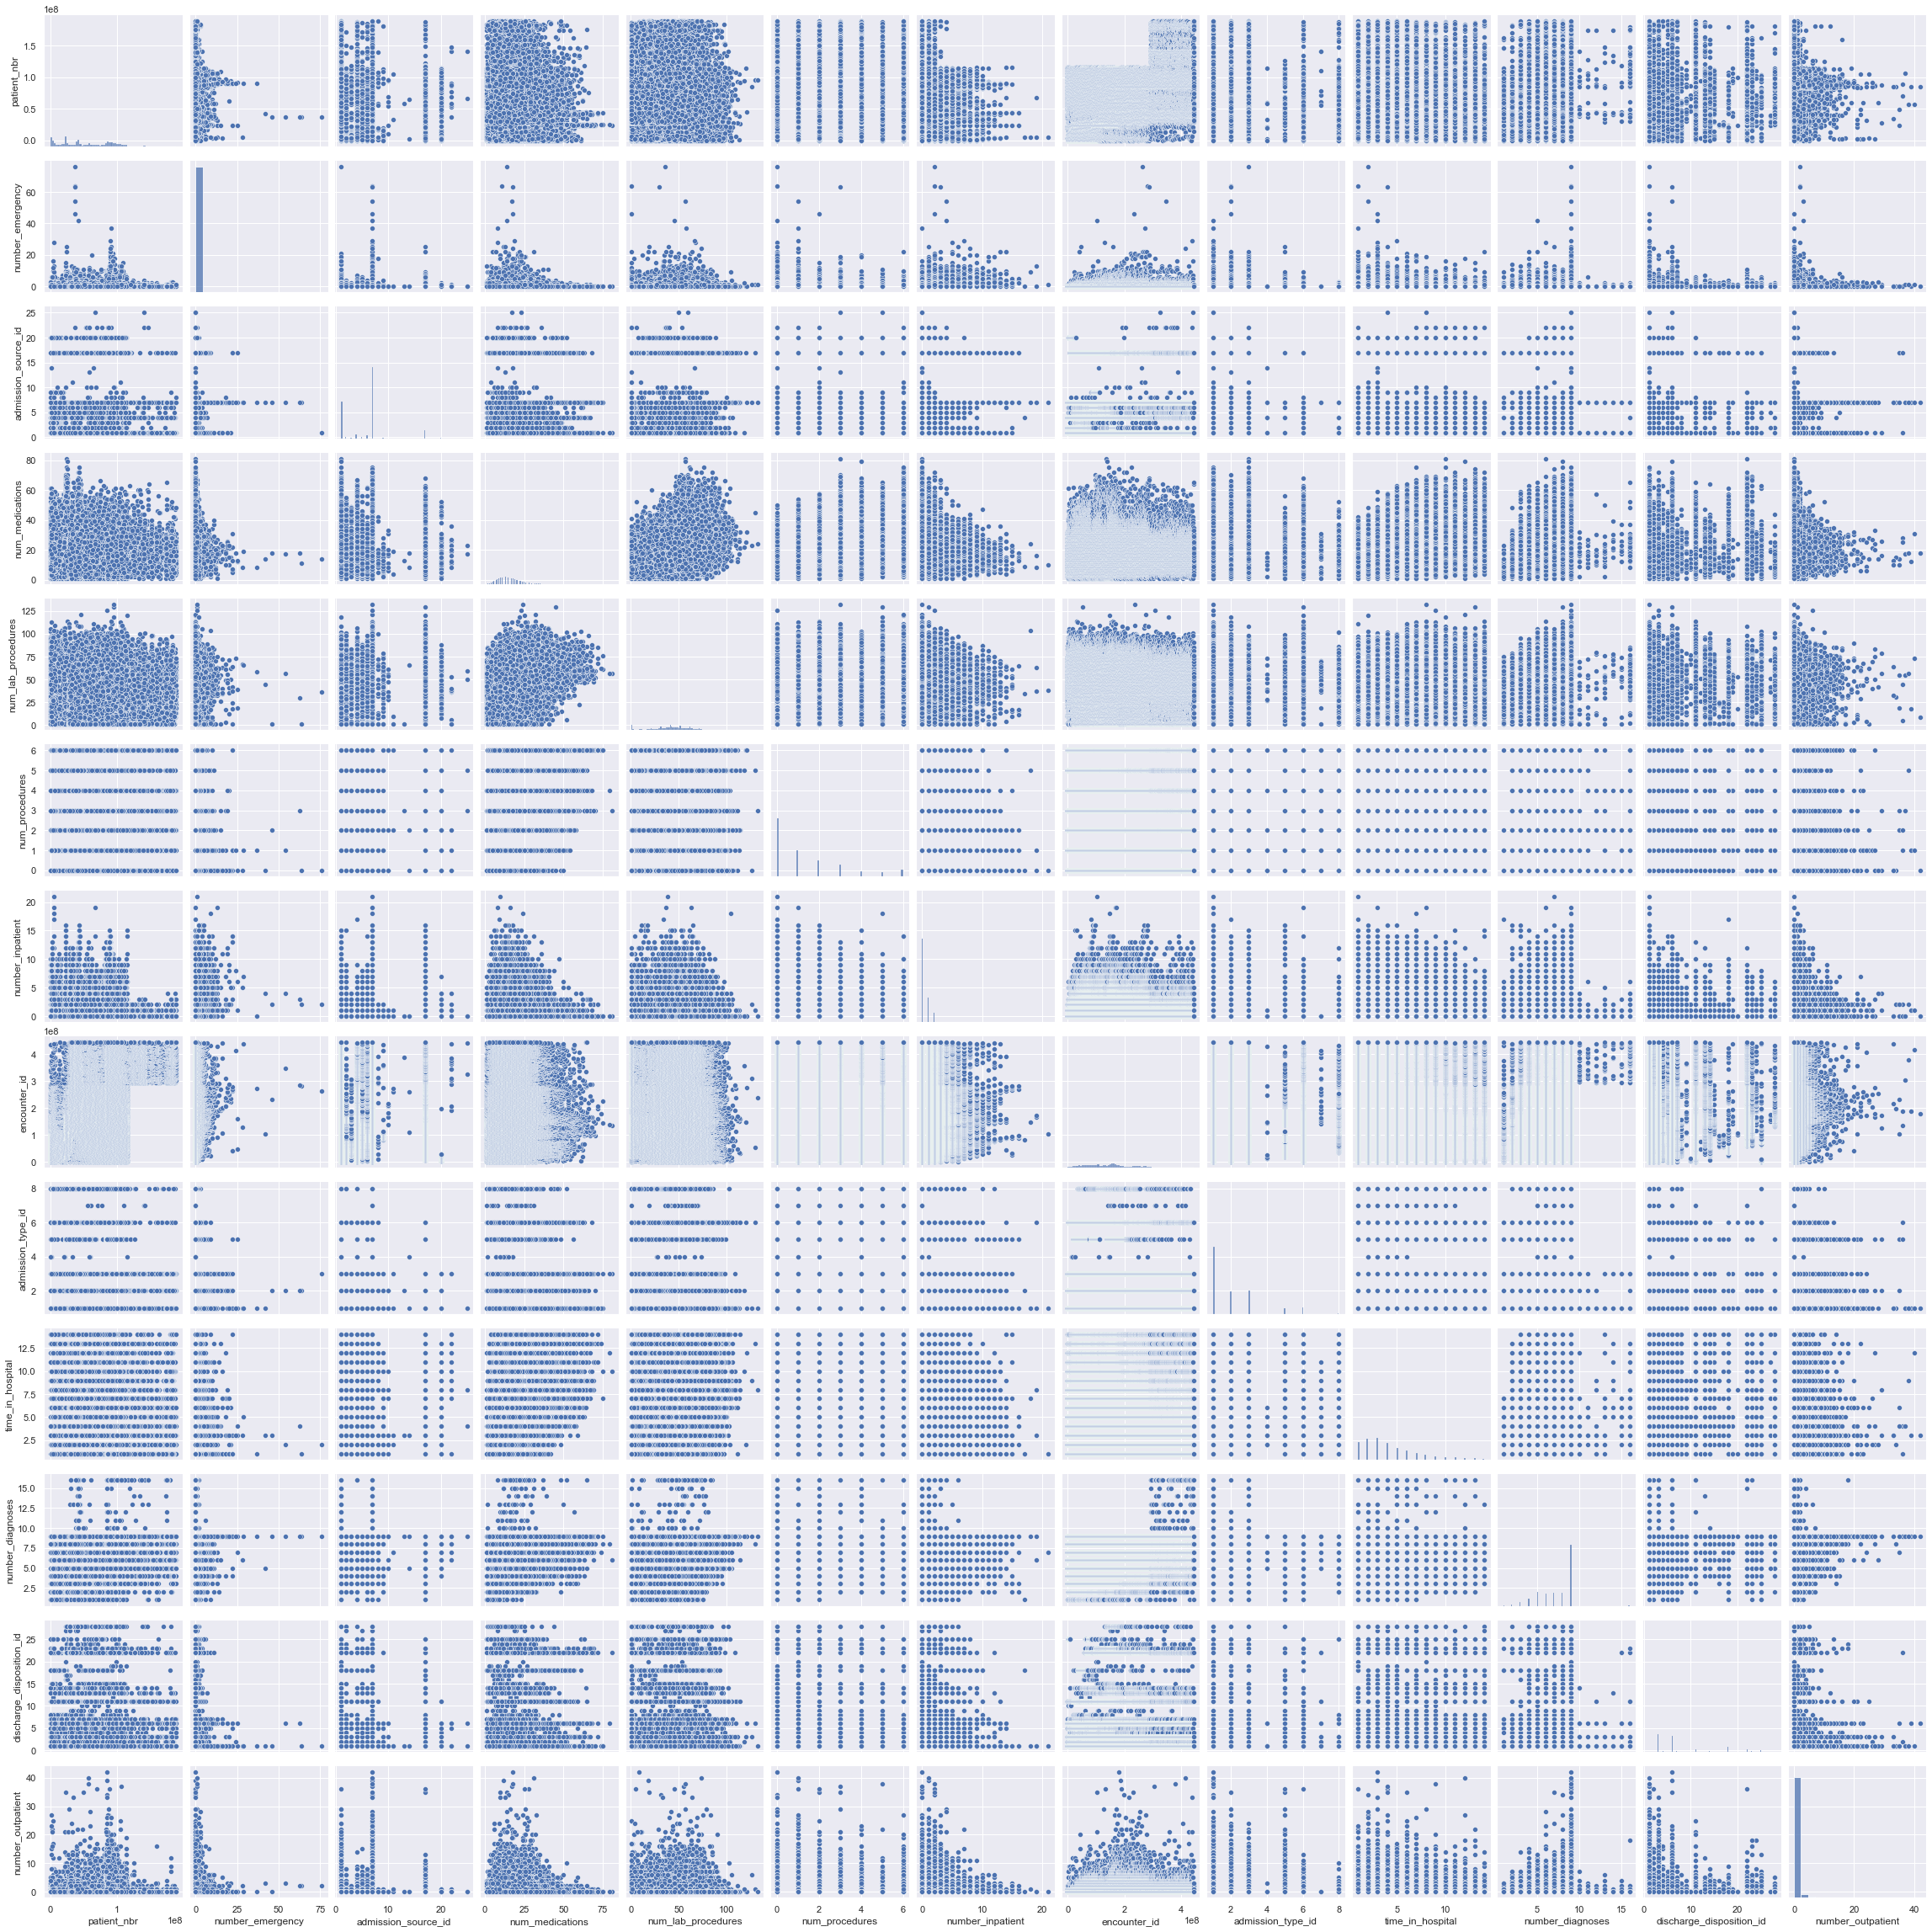

In [11]:
#data visualization using plots
num_col = list(set(list(data._get_numeric_data().columns))- {'readmitted'})
sns.set()
sns.pairplot(data[num_col], size = 2.5)
plt.show();

# Data Processing

In [12]:
# Make a copy of the file for pre-processing 
train = data.copy(deep=True)

## Processing object-type missing values

In [13]:
df = []
# Checkthe percentage of the missing values 
for col in train.columns:
    if train[col].dtype == object:
        count_missing = train[col][train[col] == '?'].count()
        percent_missing = (count_missing.sum()/train.shape[0]*100).round(2)
#         print(col,count_missing,percent_missing)
        df.append([col,count_missing,percent_missing])
missing_value=pd.DataFrame(df,columns=["col","count_missing","percent_missing"]).sort_values(by="percent_missing",ascending=False)
missing_value

col  count_missing  percent_missing
3                     weight          98569            96.86
5          medical_specialty          49949            49.08
4                 payer_code          40256            39.56
0                       race           2273             2.23
8                     diag_3           1423             1.40
7                     diag_2            358             0.35
6                     diag_1             21             0.02
29       glyburide-metformin              0             0.00
24              troglitazone              0             0.00
25                tolazamide              0             0.00
26                   examide              0             0.00
27               citoglipton              0             0.00
28                   insulin              0             0.00
33    metformin-pioglitazone              0             0.00
30       glipizide-metformin              0             0.00
31  glimepiride-pioglitazone              0             0.00
32   metformin-rosiglitazone              0             0.00
22                  acarbose              0             0.00
34                    change              0             0.00
35               diabetesMed              0             0.00
23                  miglitol              0             0.00
18                 glyburide              0             0.00
21             rosiglitazone              0             0.00
20              pioglitazone              0             0.00
19               tolbutamide              0             0.00
1                     gender              0             0.00
17                 glipizide              0             0.00
16             acetohexamide              0             0.00
15               glimepiride              0             0.00
14            chlorpropamide              0             0.00
13               nateglinide              0             0.00
12               repaglinide              0             0.00
11                 metformin              0             0.00
10                 A1Cresult              0             0.00
9              max_glu_serum              0             0.00
2                        age              0             0.00
36                readmitted              0             0.00

"""High missing values: 1. weight 2. medical_specialty 3. payer_code 4. race /
     Other values to clean: 1. diagosis_1 2. diagosis_2 3. diagnosis_3"""

### Drop high missing values 

In [14]:
# drop the irrelavant and high missing value variables
# drop weight because of its high missing value 97% 
# drop medical_specialty because of its high missing value 49.8%
train=train.drop(['weight','medical_specialty'],axis=1)
# drop payer_code because it is irrelevant to our studies 
train=train.drop(['payer_code'],axis=1)

In [15]:
train.shape

(101766, 47)

In [16]:

# Drop only the missing values in all three diagonosis categories 
train = train.drop(set(train[(train['diag_1']== '?') & (train['diag_2'] == '?') & (train['diag_3'] == '?')].index))
# Drop the patients who is expired after discharge which is out of our interest population
train = train.drop(set(train[train['discharge_disposition_id']==11].index))

In [17]:
train.shape

(100123, 47)

### Drop missing values in 'Gender' and 'Race'

In [18]:
# Process the missing values in gender
print('gender', train['gender'][train['gender'] == 'Unknown/Invalid'].count()) #only 3 missing values 
train = train.drop(set(train['gender'][train['gender'] == 'Unknown/Invalid'].index))
# Process the missing values in race
train= train.drop(set(train['race'][train['race']=='?'].index)) # drop the 2273 missing values 

gender 3


In [19]:
train.shape

(97883, 47)

### Drop irrelevant variables

In [20]:
# Drop irrelevant variables and high percent missing varaibles 
train=train.drop(["encounter_id","patient_nbr"],axis=1)

In [21]:
# Drop two attributes citoglipton and examide that have the all same value
train=train.drop(["citoglipton","examide"],axis = 1)

## Creating/recoding new features

In [22]:
train.shape

(97883, 43)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97883 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      97883 non-null  object
 1   gender                    97883 non-null  object
 2   age                       97883 non-null  object
 3   admission_type_id         97883 non-null  int64 
 4   discharge_disposition_id  97883 non-null  int64 
 5   admission_source_id       97883 non-null  int64 
 6   time_in_hospital          97883 non-null  int64 
 7   num_lab_procedures        97883 non-null  int64 
 8   num_procedures            97883 non-null  int64 
 9   num_medications           97883 non-null  int64 
 10  number_outpatient         97883 non-null  int64 
 11  number_emergency          97883 non-null  int64 
 12  number_inpatient          97883 non-null  int64 
 13  diag_1                    97883 non-null  object
 14  diag_2               

"""Recoding Plan: In this section, we recode the following variables:
   1. new variable patient_service: This new feature includes the patients' use of hospital service
   2. new variable med_change: This new feature calculate the change of medication dose of a patient
   3. new variable num_med: This new feature calculate the number of medication usage of each patient """

### Create new feature: patient_service 

In [24]:
# Create a new feature service_utilization which is sum of these 3 cols
train['patient_service'] = train['number_outpatient'] + train['number_emergency'] + train['number_inpatient']

In [25]:
train.shape

(97883, 44)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97883 entries, 0 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      97883 non-null  object
 1   gender                    97883 non-null  object
 2   age                       97883 non-null  object
 3   admission_type_id         97883 non-null  int64 
 4   discharge_disposition_id  97883 non-null  int64 
 5   admission_source_id       97883 non-null  int64 
 6   time_in_hospital          97883 non-null  int64 
 7   num_lab_procedures        97883 non-null  int64 
 8   num_procedures            97883 non-null  int64 
 9   num_medications           97883 non-null  int64 
 10  number_outpatient         97883 non-null  int64 
 11  number_emergency          97883 non-null  int64 
 12  number_inpatient          97883 non-null  int64 
 13  diag_1                    97883 non-null  object
 14  diag_2               

### Create new feature: med_change

In [27]:
# Create a new variable to calculate the change of medication dose
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
        'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 
        'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

In [28]:
train.shape

(97883, 44)

In [29]:
for col in keys:
    col_name = str(col) + 'new' #change the column name 
    train[col_name] = train[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)# recode the med use into binary variable
train['med_change'] = 0
for col in keys:
    col_name = str(col) + 'new'
    train['med_change'] = train['med_change'] + train[col_name]
    del train[col_name]

In [30]:
train.shape

(97883, 45)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97883 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      97883 non-null  object
 1   gender                    97883 non-null  object
 2   age                       97883 non-null  object
 3   admission_type_id         97883 non-null  int64 
 4   discharge_disposition_id  97883 non-null  int64 
 5   admission_source_id       97883 non-null  int64 
 6   time_in_hospital          97883 non-null  int64 
 7   num_lab_procedures        97883 non-null  int64 
 8   num_procedures            97883 non-null  int64 
 9   num_medications           97883 non-null  int64 
 10  number_outpatient         97883 non-null  int64 
 11  number_emergency          97883 non-null  int64 
 12  number_inpatient          97883 non-null  int64 
 13  diag_1                    97883 non-null  object
 14  diag_2               

In [32]:
train.head(25)

race  gender       age  admission_type_id  \
0         Caucasian  Female    [0-10)                  6   
1         Caucasian  Female   [10-20)                  1   
2   AfricanAmerican  Female   [20-30)                  1   
3         Caucasian    Male   [30-40)                  1   
4         Caucasian    Male   [40-50)                  1   
5         Caucasian    Male   [50-60)                  2   
6         Caucasian    Male   [60-70)                  3   
7         Caucasian    Male   [70-80)                  1   
8         Caucasian  Female   [80-90)                  2   
9         Caucasian  Female  [90-100)                  3   
10  AfricanAmerican  Female   [40-50)                  1   
11  AfricanAmerican    Male   [60-70)                  2   
12        Caucasian  Female   [40-50)                  1   
13        Caucasian    Male   [80-90)                  1   
14  AfricanAmerican  Female   [60-70)                  3   
15  AfricanAmerican    Male   [60-70)                  1   
16  AfricanAmerican    Male   [50-60)                  1   
17        Caucasian  Female   [50-60)                  1   
18  AfricanAmerican    Male   [70-80)                  1   
22  AfricanAmerican  Female   [70-80)                  2   
23        Caucasian  Female   [80-90)                  2   
24  AfricanAmerican  Female   [70-80)                  3   
25            Other  Female   [50-60)                  1   
26        Caucasian    Male   [80-90)                  1   
27        Caucasian  Female   [50-60)                  1   

    discharge_disposition_id  admission_source_id  time_in_hospital  \
0                         25                    1                 1   
1                          1                    7                 3   
2                          1                    7                 2   
3                          1                    7                 2   
4                          1                    7                 1   
5                          1                    2                 3   
6                          1                    2                 4   
7                          1                    7                 5   
8                          1                    4                13   
9                          3                    4                12   
10                         1                    7                 9   
11                         1                    4                 7   
12                         3                    7                 7   
13                         6                    7                10   
14                         1                    2                 1   
15                         3                    7                12   
16                         1                    7                 4   
17                         1                    7                 3   
18                         1                    7                 5   
22                         1                    4                 2   
23                         6                    1                11   
24                         1                    2                 3   
25                         1                    7                 1   
26                         3                    7                 6   
27                         1                    1                 2   

    num_lab_procedures  num_procedures  num_medications  ...  \
0                   41               0                1  ...   
1                   59               0               18  ...   
2                   11               5               13  ...   
3                   44               1               16  ...   
4                   51               0                8  ...   
5                   31               6               16  ...   
6                   70               1               21  ...   
7                   73               0               12  ...   
8                   68         

In [33]:
train.shape

(97883, 45)

In [34]:
# Check the status of the new feature med_change
train['med_change'].value_counts()

0    71177
1    25307
2     1288
3      106
4        5
Name: med_change, dtype: int64

### Create new feature: num_med

In [35]:
# calculate the number of medications used for each patient 
for col in keys:
    train[col] = train[col].replace('No', 0)
    train[col] = train[col].replace('Steady', 1)
    train[col] = train[col].replace('Up', 1)
    train[col] = train[col].replace('Down', 1) 
train['num_med'] = 0
for col in keys:
    train['num_med'] = train['num_med'] + train[col]

In [36]:
train['num_med'].value_counts()

1    45365
0    22454
2    21165
3     7537
4     1300
5       57
6        5
Name: num_med, dtype: int64

In [37]:
train['readmitted']

0          NO
1         >30
2          NO
3          NO
4          NO
         ... 
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 97883, dtype: object

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97883 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      97883 non-null  object
 1   gender                    97883 non-null  object
 2   age                       97883 non-null  object
 3   admission_type_id         97883 non-null  int64 
 4   discharge_disposition_id  97883 non-null  int64 
 5   admission_source_id       97883 non-null  int64 
 6   time_in_hospital          97883 non-null  int64 
 7   num_lab_procedures        97883 non-null  int64 
 8   num_procedures            97883 non-null  int64 
 9   num_medications           97883 non-null  int64 
 10  number_outpatient         97883 non-null  int64 
 11  number_emergency          97883 non-null  int64 
 12  number_inpatient          97883 non-null  int64 
 13  diag_1                    97883 non-null  object
 14  diag_2               

In [39]:
train.shape

(97883, 46)

### Recode diagnosis into new categories 

In [40]:
"""diag_1=primary diagnosis; diag_2=secondary diagnosis; diag_3=additional diagnosis\
i"""
# duplicate a diagnosis column
train['primary_diag'] = train['diag_1']
train['secondary_diag'] = train['diag_2']
train['additional_diag'] = train['diag_3']

In [41]:
train.shape

(97883, 49)

In [42]:
# replace the unknown values "?" with -1
train['primary_diag'] = train['primary_diag'].replace('?', -1)
train['secondary_diag'] = train['secondary_diag'].replace('?', -1)
train['additional_diag'] = train['additional_diag'].replace('?', -1)

In [43]:
train.shape

(97883, 49)

In [44]:
# recode ICE code of V or E to “other” category = 0
train.loc[train['diag_1'].str.contains('V'), ['primary_diag']] = 0
train.loc[train['diag_1'].str.contains('E'), ['primary_diag']] = 0
train.loc[train['diag_2'].str.contains('V'), ['secondary_diag']] = 0
train.loc[train['diag_2'].str.contains('E'), ['secondary_diag']] = 0
train.loc[train['diag_3'].str.contains('V'), ['additional_diag']] = 0
train.loc[train['diag_3'].str.contains('E'), ['additional_diag']] = 0

In [45]:
train.dtypes

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                    int64
repaglinide                  int64
nateglinide                  int64
chlorpropamide               int64
glimepiride                  int64
acetohexamide                int64
glipizide                    int64
glyburide                    int64
tolbutamide                  int64
pioglitazone        

In [46]:
# convert the data type to float to enable computations later
train['primary_diag'] = train['primary_diag'].astype(float)
train['secondary_diag'] = train['secondary_diag'].astype(float)
train['additional_diag'] = train['additional_diag'].astype(float)

In [47]:
train.dtypes

race                         object
gender                       object
age                          object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                object
A1Cresult                    object
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
acetohexamide                 int64
glipizide                     int64
glyburide                     int64
tolbutamide                 

In [48]:
# recode ICD codes of diag1,diag2,diag3 between certain ranges to certain categories
for index, row in train.iterrows():
    if (row['primary_diag'] >= 390 and row['primary_diag'] < 460) or (np.floor(row['primary_diag']) == 785):
        train.loc[index, 'primary_diag'] = 1
    elif (row['primary_diag'] >= 460 and row['primary_diag'] < 520) or (np.floor(row['primary_diag']) == 786):
        train.loc[index, 'primary_diag'] = 2
    elif (row['primary_diag'] >= 520 and row['primary_diag'] < 580) or (np.floor(row['primary_diag']) == 787):
        train.loc[index, 'primary_diag'] = 3
    elif (np.floor(row['primary_diag']) == 250):
        train.loc[index, 'primary_diag'] = 4
    elif (row['primary_diag'] >= 800 and row['primary_diag'] < 1000):
        train.loc[index, 'primary_diag'] = 5
    elif (row['primary_diag'] >= 710 and row['primary_diag'] < 740):
        train.loc[index, 'primary_diag'] = 6
    elif (row['primary_diag'] >= 580 and row['primary_diag'] < 630) or (np.floor(row['primary_diag']) == 788):
        train.loc[index, 'primary_diag'] = 7
    elif (row['primary_diag'] >= 140 and row['primary_diag'] < 240):
        train.loc[index, 'primary_diag'] = 8
    else:
        train.loc[index, 'primary_diag'] = 0

In [49]:
for index, row in train.iterrows():
    if (row['secondary_diag'] >= 390 and row['secondary_diag'] < 460) or (np.floor(row['secondary_diag']) == 785):
        train.loc[index, 'secondary_diag'] = 1
    elif (row['secondary_diag'] >= 460 and row['secondary_diag'] < 520) or (np.floor(row['secondary_diag']) == 786):
        train.loc[index, 'secondary_diag'] = 2
    elif (row['secondary_diag'] >= 520 and row['secondary_diag'] < 580) or (np.floor(row['secondary_diag']) == 787):
        train.loc[index, 'secondary_diag'] = 3
    elif (np.floor(row['secondary_diag']) == 250):
        train.loc[index, 'secondary_diag'] = 4
    elif (row['secondary_diag'] >= 800 and row['secondary_diag'] < 1000):
        train.loc[index, 'secondary_diag'] = 5
    elif (row['secondary_diag'] >= 710 and row['secondary_diag'] < 740):
        train.loc[index, 'secondary_diag'] = 6
    elif (row['secondary_diag'] >= 580 and row['secondary_diag'] < 630) or (np.floor(row['secondary_diag']) == 788):
        train.loc[index, 'secondary_diag'] = 7
    elif (row['secondary_diag'] >= 140 and row['secondary_diag'] < 240):
        train.loc[index, 'secondary_diag'] = 8
    else:
        train.loc[index, 'secondary_diag'] = 0

In [50]:
for index, row in train.iterrows():
    if (row['additional_diag'] >= 390 and row['additional_diag'] < 460) or (np.floor(row['additional_diag']) == 785):
        train.loc[index, 'additional_diag'] = 1
    elif (row['additional_diag'] >= 460 and row['additional_diag'] < 520) or (np.floor(row['additional_diag']) == 786):
        train.loc[index, 'additional_diag'] = 2
    elif (row['additional_diag'] >= 520 and row['additional_diag'] < 580) or (np.floor(row['additional_diag']) == 787):
        train.loc[index, 'additional_diag'] = 3
    elif (np.floor(row['additional_diag']) == 250):
        train.loc[index, 'additional_diag'] = 4
    elif (row['additional_diag'] >= 800 and row['additional_diag'] < 1000):
        train.loc[index, 'additional_diag'] = 5
    elif (row['additional_diag'] >= 710 and row['additional_diag'] < 740):
        train.loc[index, 'additional_diag'] = 6
    elif (row['additional_diag'] >= 580 and row['additional_diag'] < 630) or (np.floor(row['additional_diag']) == 788):
        train.loc[index, 'additional_diag'] = 7
    elif (row['additional_diag'] >= 140 and row['additional_diag'] < 240):
        train.loc[index, 'additional_diag'] = 8
    else:
        train.loc[index, 'additional_diag'] = 0

In [51]:
train[['diag_1','primary_diag']].head(15).T

0    1    2    3    4    5    6    7    8    9      10   11  \
diag_1        250.83  276  648    8  197  414  414  428  398  434  250.7  157   
primary_diag     4.0  0.0  0.0  0.0  8.0  1.0  1.0  1.0  1.0  1.0    4.0  8.0   

               12   13   14  
diag_1        428  428  518  
primary_diag  1.0  1.0  2.0

In [52]:
train[['diag_2','secondary_diag']].head(15).T

0       1    2       3    4    5    6    7    8    9    10  \
diag_2            ?  250.01  250  250.43  157  411  411  492  427  198  403   
secondary_diag  0.0     4.0  4.0     4.0  8.0  1.0  1.0  2.0  1.0  8.0  1.0   

                 11      12   13   14  
diag_2          288  250.43  411  998  
secondary_diag  0.0     4.0  1.0  5.0

In [53]:
train[['diag_3','additional_diag']].head(15).T

0    1    2    3    4    5    6    7    8    9    10   11  \
diag_3             ?  255  V27  403  250  250  V45  250   38  486  996  197   
additional_diag  0.0  0.0  0.0  1.0  4.0  4.0  0.0  4.0  0.0  2.0  5.0  8.0   

                    12   13   14  
diag_3           250.6  427  627  
additional_diag    4.0  1.0  7.0

### Recode admission_type_id and discharge_disposition_id and admission_source_id

In [54]:
"""Use the similarity of the categories to recode and reduct the categories"""

'Use the similarity of the categories to recode and reduct the categories'

In [55]:
train['admission_type_id'].value_counts()

1    51818
3    18383
2    17542
6     5162
5     4634
8      317
7       17
4       10
Name: admission_type_id, dtype: int64

In [56]:
# recode admission type (1-Emergency 5-Referral)
train['admission_type_id'] = train['admission_type_id'].replace(2,1)
train['admission_type_id'] = train['admission_type_id'].replace(7,1)
train['admission_type_id'] = train['admission_type_id'].replace(6,5)
train['admission_type_id'] = train['admission_type_id'].replace(8,5)

In [57]:
train['discharge_disposition_id'].sort_values(ascending=False,inplace=False).value_counts()

1     58767
3     13614
6     12698
18     3673
2      2061
22     1981
5      1143
25      973
4       765
7       611
23      406
13      396
14      369
28      138
8       107
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [58]:
# recode discharge_disposition_id type (1-discharged to home 2-other 3-? 4-?)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(6,1)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(8,1)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(9,1)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(13,1)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(3,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(4,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(5,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(14,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(22,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(23,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(24,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(12,10)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(15,10)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(16,10)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(17,10)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(25,18)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(26,18)

In [59]:
train['admission_source_id'].sort_values(ascending=False,inplace=False).value_counts()

7     55527
1     28617
17     6565
4      2936
6      1969
2      1023
5       808
3       185
20      158
9        54
8        15
22       12
10        7
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64

In [60]:
# recode ad_mission_source_id type (1-emergency 4-home 9-transfer 11-other) 
train['admission_source_id'] = train['admission_source_id'].replace(2,1)
train['admission_source_id'] = train['admission_source_id'].replace(3,1)
train['admission_source_id'] = train['admission_source_id'].replace(5,4)
train['admission_source_id'] = train['admission_source_id'].replace(6,4)
train['admission_source_id'] = train['admission_source_id'].replace(10,4)
train['admission_source_id'] = train['admission_source_id'].replace(22,4)
train['admission_source_id'] = train['admission_source_id'].replace(25,4)
train['admission_source_id'] = train['admission_source_id'].replace(7,9)
train['admission_source_id'] = train['admission_source_id'].replace(17,9)
train['admission_source_id'] = train['admission_source_id'].replace(20,9)
train['admission_source_id'] = train['admission_source_id'].replace(21,9)
train['admission_source_id'] = train['admission_source_id'].replace(13,11)
train['admission_source_id'] = train['admission_source_id'].replace(14,11)

### Create dummy Variables-change, gender and diabetesMed

In [61]:
train.head(10)

race  gender       age  admission_type_id  \
0        Caucasian  Female    [0-10)                  5   
1        Caucasian  Female   [10-20)                  1   
2  AfricanAmerican  Female   [20-30)                  1   
3        Caucasian    Male   [30-40)                  1   
4        Caucasian    Male   [40-50)                  1   
5        Caucasian    Male   [50-60)                  1   
6        Caucasian    Male   [60-70)                  3   
7        Caucasian    Male   [70-80)                  1   
8        Caucasian  Female   [80-90)                  1   
9        Caucasian  Female  [90-100)                  3   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
0                        18                    1                 1   
1                         1                    9                 3   
2                         1                    9                 2   
3                         1                    9                 2   
4                         1                    9                 1   
5                         1                    1                 3   
6                         1                    1                 4   
7                         1                    9                 5   
8                         1                    4                13   
9                         2                    4                12   

   num_lab_procedures  num_procedures  num_medications  ...  \
0                  41               0                1  ...   
1                  59               0               18  ...   
2                  11               5               13  ...   
3                  44               1               16  ...   
4                  51               0                8  ...   
5                  31               6               16  ...   
6                  70               1               21  ...   
7                  73               0               12  ...   
8                  68               2               28  ...   
9                  33               3               18  ...   

   metformin-pioglitazone  change  diabetesMed readmitted patient_service  \
0                       0      No           No         NO               0   
1                       0      Ch          Yes        >30               0   
2                       0      No          Yes         NO               3   
3                       0      Ch          Yes         NO               0   
4                       0      Ch          Yes         NO               0   
5                       0      No          Yes        >30               0   
6                       0      Ch          Yes         NO               0   
7                       0      No          Yes        >30               0   
8                       0      Ch          Yes         NO               0   
9                       0      Ch          Yes         NO               0   

  med_change  num_med primary_diag secondary_diag  additional_diag  
0          0        0          4.0            0.0              0.0  
1          1        1          0.0            4.0              0.0  
2          0        1          0.0            4.0              0.0  
3          1        1          0.0            4.0              1.0  
4          0        2          8.0            8.0              4.0  
5          0        1          1.0            1.0              4.0  
6          0        3          1.0            1.0              0.0  
7          0        1          1.0            2.0              4.0  
8          0        2          1.0            1.0              0.0  
9          0        2          1.0            8.0              2.0  

[10 rows x 49 columns]

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97883 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      97883 non-null  object 
 1   gender                    97883 non-null  object 
 2   age                       97883 non-null  object 
 3   admission_type_id         97883 non-null  int64  
 4   discharge_disposition_id  97883 non-null  int64  
 5   admission_source_id       97883 non-null  int64  
 6   time_in_hospital          97883 non-null  int64  
 7   num_lab_procedures        97883 non-null  int64  
 8   num_procedures            97883 non-null  int64  
 9   num_medications           97883 non-null  int64  
 10  number_outpatient         97883 non-null  int64  
 11  number_emergency          97883 non-null  int64  
 12  number_inpatient          97883 non-null  int64  
 13  diag_1                    97883 non-null  object 
 14  diag_

In [63]:
# Recode change 
train['change'] = train['change'].replace('Ch', 1)
train['change'] = train['change'].replace('No', 0)
# Recode gender 
train['gender'] = train['gender'].replace('Male', 1)
train['gender'] = train['gender'].replace('Female', 0)
# Recode diabetesMed
train['diabetesMed'] = train['diabetesMed'].replace('Yes', 1)
train['diabetesMed'] = train['diabetesMed'].replace('No', 0)

### Recode the outcome variable-Readmitted

In [64]:
"""Since our interest here is the readmission rate that is less than 30 days??"""
# calculate the outcome variable readmission
train['readmitted'] = train['readmitted'].replace('>30', 0)
train['readmitted'] = train['readmitted'].replace('<30', 1)
train['readmitted'] = train['readmitted'].replace('NO', 0)

### Recode the ordinal variable-Age

In [65]:
train['age'].sort_values(ascending=False).value_counts()

[70-80)     24978
[60-70)     21699
[50-60)     16743
[80-90)     16320
[40-50)      9408
[30-40)      3689
[90-100)     2601
[20-30)      1604
[10-20)       682
[0-10)        159
Name: age, dtype: int64

In [66]:
#recode age using mean of each order 
"""recode it by means is the trade-off of uisng the continuous 1-10. Using the mean can maintain the interpretability of the age"""
age_dict = {'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95}
train['age'] = train.age.map(age_dict)
train['age'] = train['age'].astype('int64')

### Recode the categorical variables: Race, A1Cresult,max_glu_serum

In [67]:
train['race'].sort_values(ascending=False,inplace=False).value_counts()

Caucasian          74854
AfricanAmerican    18888
Hispanic            2024
Other               1485
Asian                632
Name: race, dtype: int64

In [68]:
train['race'] = train['race'].replace('Caucasian', 1)
train['race'] = train['race'].replace('AfricanAmerican', 2)
train['race'] = train['race'].replace('Hispanic', 3)
train['race'] = train['race'].replace('Asian', 4) 
train['race'] = train['race'].replace('Other', 0) 

In [69]:
train['A1Cresult'].sort_values(ascending=False,inplace=False).value_counts()

None    81427
>8       7897
Norm     4857
>7       3702
Name: A1Cresult, dtype: int64

In [70]:
# recode A1Cresult 
train['A1Cresult'] = train['A1Cresult'].replace('>7', 1)
train['A1Cresult'] = train['A1Cresult'].replace('>8', 1)
train['A1Cresult'] = train['A1Cresult'].replace('Norm', 0)
train['A1Cresult'] = train['A1Cresult'].replace('None', 99) 

In [71]:
train['max_glu_serum'].sort_values(ascending=False,inplace=False).value_counts()

None    92712
Norm     2549
>200     1421
>300     1201
Name: max_glu_serum, dtype: int64

In [72]:
# recode max_glu_serum using the similar approach
train['max_glu_serum'] = train['max_glu_serum'].replace('>200', 1)
train['max_glu_serum'] = train['max_glu_serum'].replace('>300', 1)
train['max_glu_serum'] = train['max_glu_serum'].replace('Norm', 0)
train['max_glu_serum'] = train['max_glu_serum'].replace('None', 99)

In [73]:
pd.set_option('display.max_columns', 500)

In [74]:
train.head(10).T

0       1    2       3    4    5    6    7  \
race                           1       1    2       1    1    1    1    1   
gender                         0       0    0       1    1    1    1    1   
age                            5      15   25      35   45   55   65   75   
admission_type_id              5       1    1       1    1    1    3    1   
discharge_disposition_id      18       1    1       1    1    1    1    1   
admission_source_id            1       9    9       9    9    1    1    9   
time_in_hospital               1       3    2       2    1    3    4    5   
num_lab_procedures            41      59   11      44   51   31   70   73   
num_procedures                 0       0    5       1    0    6    1    0   
num_medications                1      18   13      16    8   16   21   12   
number_outpatient              0       0    2       0    0    0    0    0   
number_emergency               0       0    0       0    0    0    0    0   
number_inpatient               0       0    1       0    0    0    0    0   
diag_1                    250.83     276  648       8  197  414  414  428   
diag_2                         ?  250.01  250  250.43  157  411  411  492   
diag_3                         ?     255  V27     403  250  250  V45  250   
number_diagnoses               1       9    6       7    5    9    7    8   
max_glu_serum                 99      99   99      99   99   99   99   99   
A1Cresult                     99      99   99      99   99   99   99   99   
metformin                      0       0    0       0    0    0    1    0   
repaglinide                    0       0    0       0    0    0    0    0   
nateglinide                    0       0    0       0    0    0    0    0   
chlorpropamide                 0       0    0       0    0    0    0    0   
glimepiride                    0       0    0       0    0    0    1    0   
acetohexamide                  0       0    0       0    0    0    0    0   
glipizide                      0       0    1       0    1    0    0    0   
glyburide                      0       0    0       0    0    0    0    1   
tolbutamide                    0       0    0       0    0    0    0    0   
pioglitazone                   0       0    0       0    0    0    0    0   
rosiglitazone                  0       0    0       0    0    0    0    0   
acarbose                       0       0    0       0    0    0    0    0   
miglitol                       0       0    0       0    0    0    0    0   
troglitazone                   0       0    0       0    0    0    0    0   
tolazamide                     0       0    0       0    0    0    0    0   
insulin                        0       1    0       1    1    1    1    0   
glyburide-metformin            0       0    0       0    0    0    0    0   
glipizide-metformin            0       0    0       0    0    0    0    0   
glimepiride-pioglitazone       0       0    0       0    0    0    0    0   
metformin-rosiglitazone        0       0    0       0    0    0    0    0   
metformin-pioglitazone         0       0    0       0    0    0    0    0   
change                         0       1    0       1    1    0    1    0   
diabetesMed                    0       1    1       1    1    1    1    1   
readmitted                     0       0    0       0    0    0    0    0   
patient_service                0       0    3       0    0    0    0    0   
med_change                     0       1    0       1    0    0    0    0   
num_med                        0       1    1       1    2    1    3    1   
primary_diag                 4.0     0.0  0.0     0.0  8.0  1.0  1.0  1.0   
secondary_diag               0.0     4.0  4.0     4.0  8.0  1.0  1.0  2.0   
additional_diag              0.0     0.0  0.0     1.0  4.0  4.0  0.0  4.0   

                            8    9  
race                        1    1  
gender                      0    0  
age                        85   95  
admission_type_id           1   

In [75]:
train.to_csv('./modified_diabetes1205_beforeEDA.csv',index=None)

# Feature Engineering 

In [76]:
train=pd.read_csv('./modified_diabetes1205_beforeEDA.csv')

In [77]:
train.head(10).T

0       1    2       3    4    5    6    7  \
race                           1       1    2       1    1    1    1    1   
gender                         0       0    0       1    1    1    1    1   
age                            5      15   25      35   45   55   65   75   
admission_type_id              5       1    1       1    1    1    3    1   
discharge_disposition_id      18       1    1       1    1    1    1    1   
admission_source_id            1       9    9       9    9    1    1    9   
time_in_hospital               1       3    2       2    1    3    4    5   
num_lab_procedures            41      59   11      44   51   31   70   73   
num_procedures                 0       0    5       1    0    6    1    0   
num_medications                1      18   13      16    8   16   21   12   
number_outpatient              0       0    2       0    0    0    0    0   
number_emergency               0       0    0       0    0    0    0    0   
number_inpatient               0       0    1       0    0    0    0    0   
diag_1                    250.83     276  648       8  197  414  414  428   
diag_2                         ?  250.01  250  250.43  157  411  411  492   
diag_3                         ?     255  V27     403  250  250  V45  250   
number_diagnoses               1       9    6       7    5    9    7    8   
max_glu_serum                 99      99   99      99   99   99   99   99   
A1Cresult                     99      99   99      99   99   99   99   99   
metformin                      0       0    0       0    0    0    1    0   
repaglinide                    0       0    0       0    0    0    0    0   
nateglinide                    0       0    0       0    0    0    0    0   
chlorpropamide                 0       0    0       0    0    0    0    0   
glimepiride                    0       0    0       0    0    0    1    0   
acetohexamide                  0       0    0       0    0    0    0    0   
glipizide                      0       0    1       0    1    0    0    0   
glyburide                      0       0    0       0    0    0    0    1   
tolbutamide                    0       0    0       0    0    0    0    0   
pioglitazone                   0       0    0       0    0    0    0    0   
rosiglitazone                  0       0    0       0    0    0    0    0   
acarbose                       0       0    0       0    0    0    0    0   
miglitol                       0       0    0       0    0    0    0    0   
troglitazone                   0       0    0       0    0    0    0    0   
tolazamide                     0       0    0       0    0    0    0    0   
insulin                        0       1    0       1    1    1    1    0   
glyburide-metformin            0       0    0       0    0    0    0    0   
glipizide-metformin            0       0    0       0    0    0    0    0   
glimepiride-pioglitazone       0       0    0       0    0    0    0    0   
metformin-rosiglitazone        0       0    0       0    0    0    0    0   
metformin-pioglitazone         0       0    0       0    0    0    0    0   
change                         0       1    0       1    1    0    1    0   
diabetesMed                    0       1    1       1    1    1    1    1   
readmitted                     0       0    0       0    0    0    0    0   
patient_service                0       0    3       0    0    0    0    0   
med_change                     0       1    0       1    0    0    0    0   
num_med                        0       1    1       1    2    1    3    1   
primary_diag                 4.0     0.0  0.0     0.0  8.0  1.0  1.0  1.0   
secondary_diag               0.0     4.0  4.0     4.0  8.0  1.0  1.0  2.0   
additional_diag              0.0     0.0  0.0     1.0  4.0  4.0  0.0  4.0   

                            8    9  
race                        1    1  
gender                      0    0  
age                        85   95  
admission_type_id           1   

In [78]:
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97883 entries, 0 to 97882
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      97883 non-null  int64  
 1   gender                    97883 non-null  int64  
 2   age                       97883 non-null  int64  
 3   admission_type_id         97883 non-null  int64  
 4   discharge_disposition_id  97883 non-null  int64  
 5   admission_source_id       97883 non-null  int64  
 6   time_in_hospital          97883 non-null  int64  
 7   num_lab_procedures        97883 non-null  int64  
 8   num_procedures            97883 non-null  int64  
 9   num_medications           97883 non-null  int64  
 10  number_outpatient         97883 non-null  int64  
 11  number_emergency          97883 non-null  int64  
 12  number_inpatient          97883 non-null  int64  
 13  diag_1                    97883 non-null  object 
 14  diag_2

## Data type conversion

In [79]:
"""This serves for the numerical data processing and transformation"""
train.dtypes

race                          int64
gender                        int64
age                           int64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
acetohexamide                 int64
glipizide                     int64
glyburide                     int64
tolbutamide                 

In [80]:
i = ['race','gender','age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
          'max_glu_serum', 'primary_diag', 'secondary_diag', 'additional_diag']



In [81]:
train[i] = train[i].astype('object')
train['num_lab_procedures']=train['num_lab_procedures'].astype('int64')

train['time_in_hospital']=train['time_in_hospital'].astype('int64')

In [82]:
for i in train.columns:
    if train[i].dtype==object:
        d= train[i].value_counts()
        print(pd.DataFrame(data=d))

    race
1  74854
2  18888
3   2024
0   1485
4    632
   gender
0   52747
1   45136
      age
75  24978
65  21699
55  16743
85  16320
45   9408
35   3689
95   2601
25   1604
15    682
5     159
   admission_type_id
1              69377
3              18383
5              10113
4                 10
    discharge_disposition_id
1                      71989
2                      20387
18                      4646
7                        611
28                       138
10                        97
19                         8
27                         5
20                         2
    admission_source_id
9                 62304
1                 29825
4                  5734
8                    15
11                    5
     diag_1
428    6613
414    6381
786    3938
410    3387
486    3332
..      ...
216       1
V43       1
838       1
955       1
V51       1

[714 rows x 1 columns]
      diag_2
276     6539
428     6393
250     5867
427     4830
401     3631
...      ...
E850    

In [83]:
train.dtypes

race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone        

## Normality 

In [84]:
# Get the list of the numerical variable  
num_col = list(set(list(train._get_numeric_data().columns))- {'readmitted'})
num_col

['number_emergency',
 'num_med',
 'num_medications',
 'num_lab_procedures',
 'num_procedures',
 'number_inpatient',
 'med_change',
 'number_diagnoses',
 'time_in_hospital',
 'patient_service',
 'number_outpatient']

In [85]:
train.dtypes

race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone        

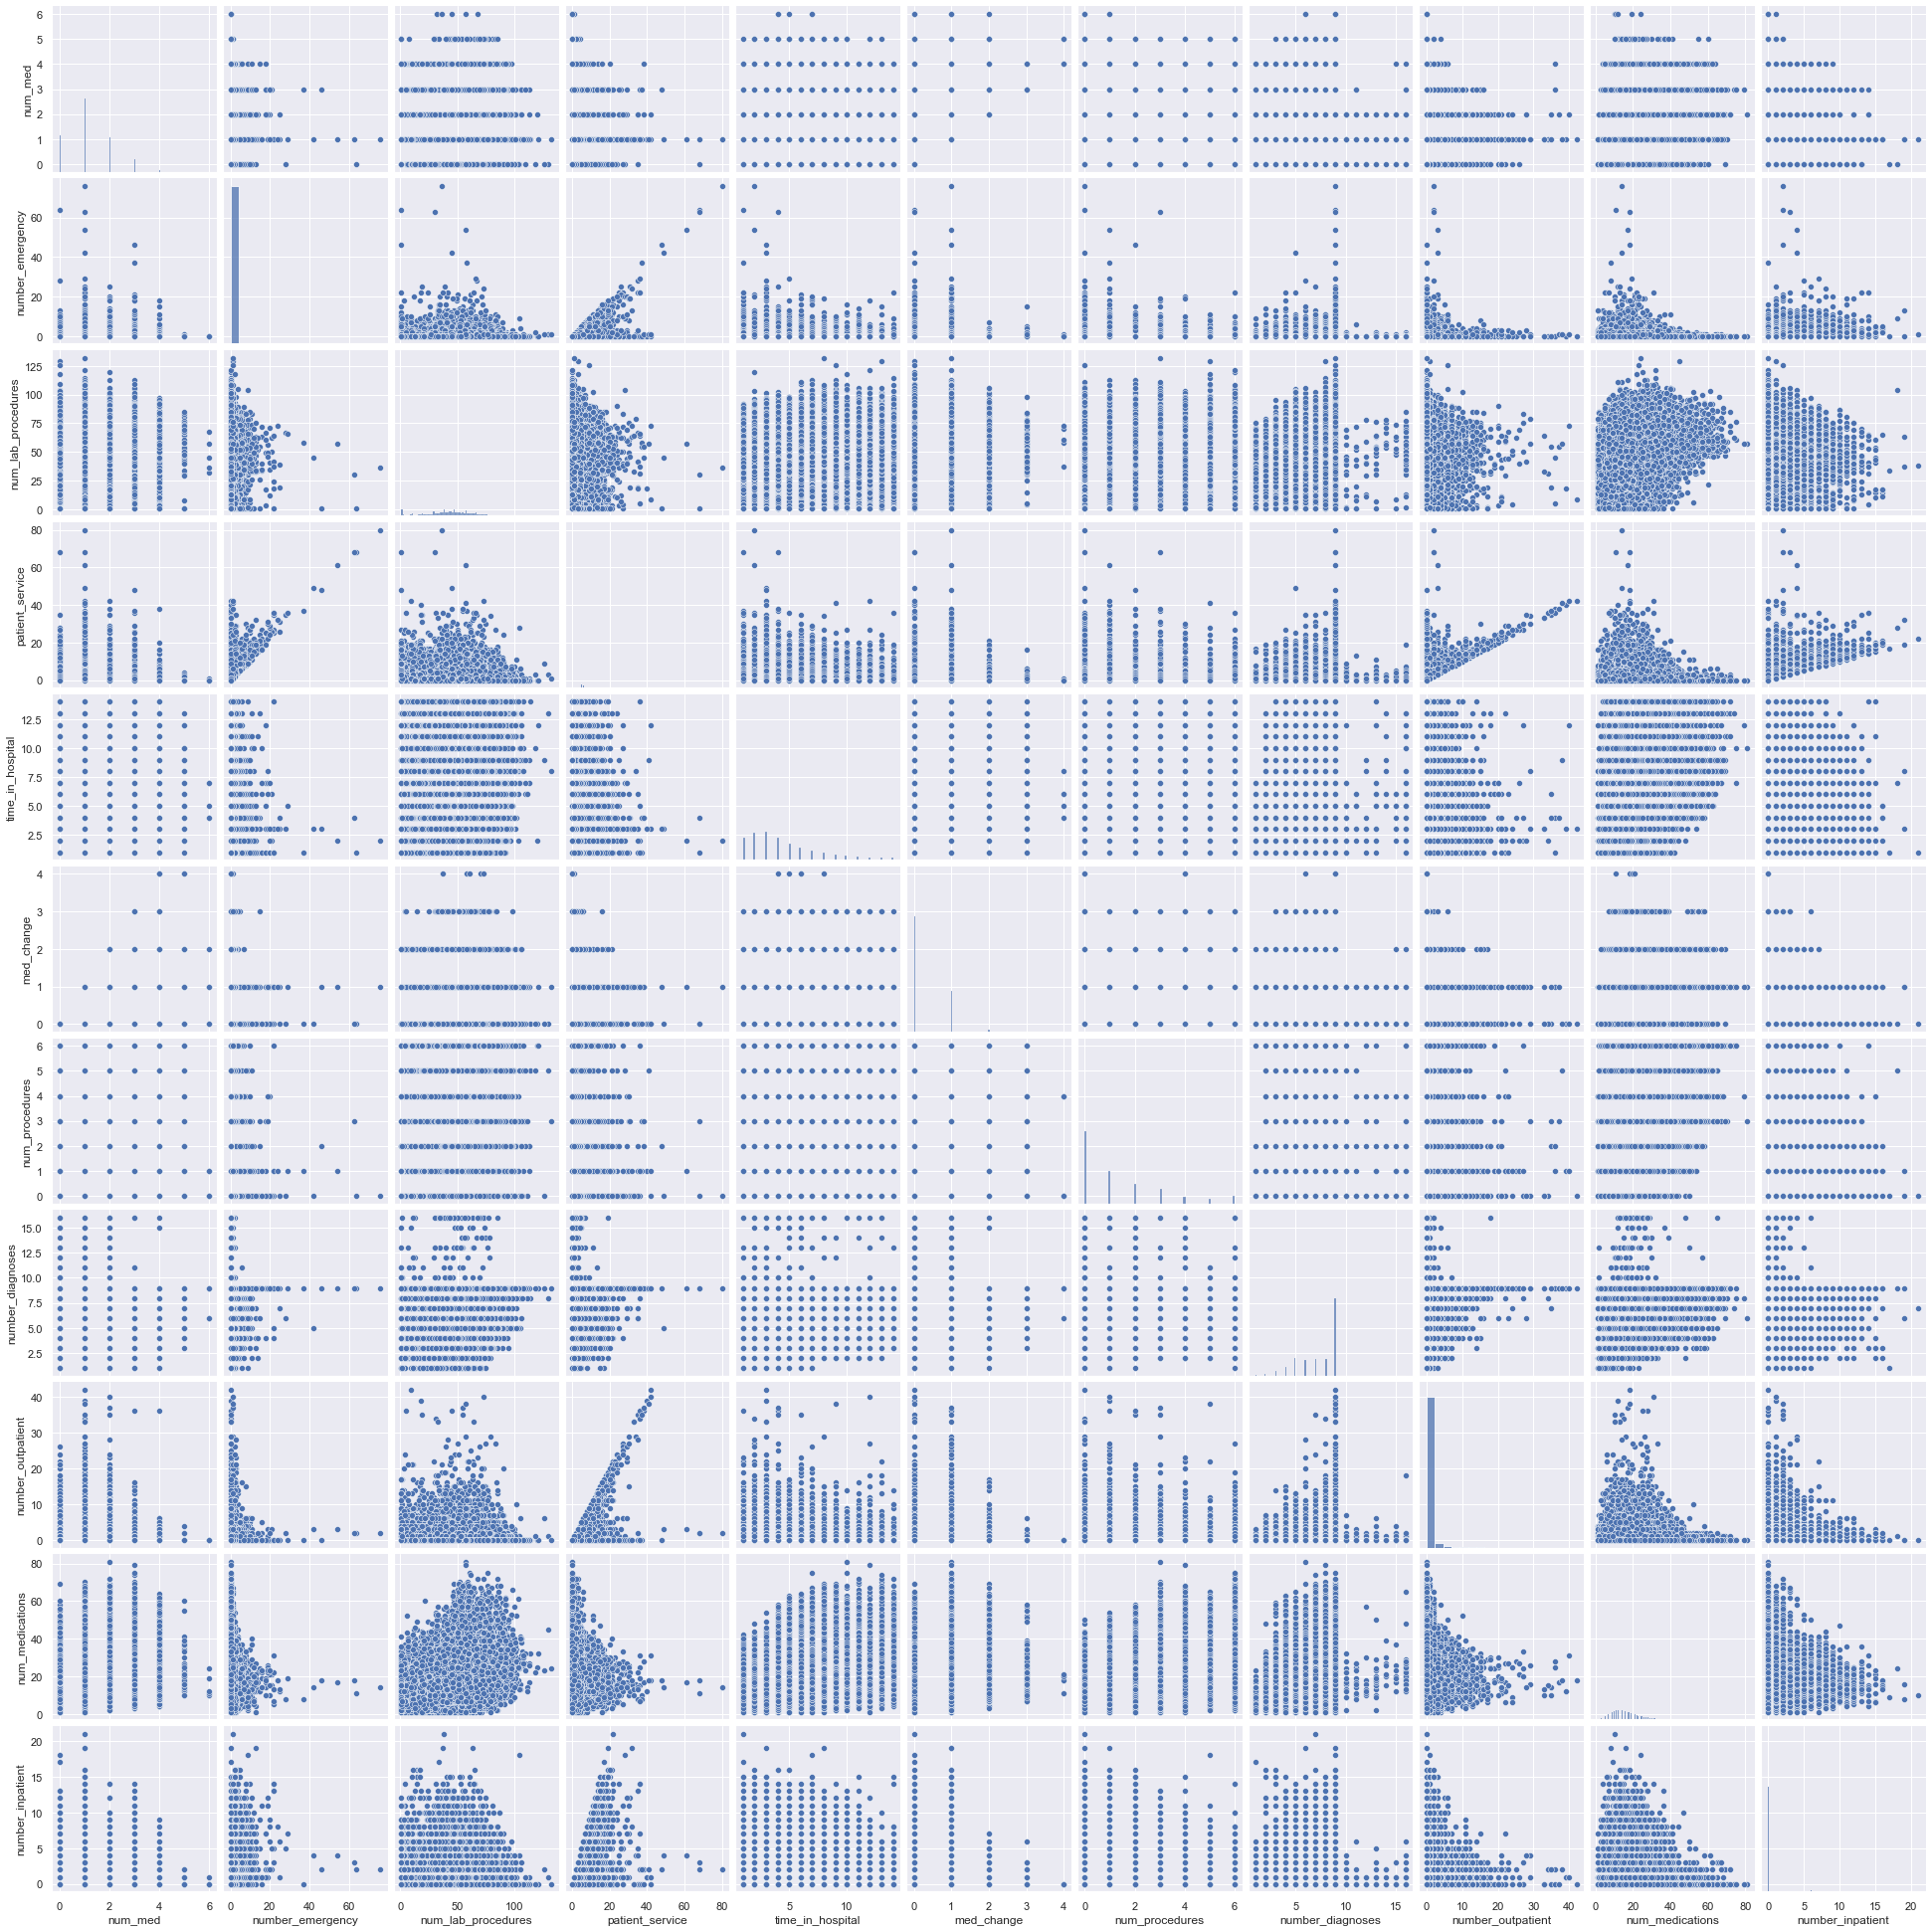

In [86]:
# Plot the pair scatter plot to check the distribution 
sns.set()
cols = ['num_med',
 'number_emergency',
 'num_lab_procedures',
 'patient_service',
 'time_in_hospital',
 'med_change',
 'num_procedures',
 'number_diagnoses',
 'number_outpatient',
 'num_medications',
 'number_inpatient']
sns.pairplot(train[cols], height =2.5)
plt.show();

In [87]:
# Check the skewness and kurtosis of the variables 
from scipy import stats
i=['num_med',
 'number_emergency',
 'num_lab_procedures',
 'patient_service',
 'time_in_hospital',
 'med_change',
 'num_procedures',
 'number_diagnoses',
 'number_outpatient',
 'num_medications',
 'number_inpatient']
print(train[i].skew())
print(train[i].kurt())

num_med                0.678066
number_emergency      22.649042
num_lab_procedures    -0.239627
patient_service        5.313745
time_in_hospital       1.137276
med_change             1.423876
num_procedures         1.324363
number_diagnoses      -0.891600
number_outpatient      8.790942
num_medications        1.328952
number_inpatient       3.609237
dtype: float64
num_med                  0.282313
number_emergency      1163.612749
num_lab_procedures      -0.255417
patient_service         67.142638
time_in_hospital         0.867396
med_change               1.435763
num_procedures           0.891609
number_diagnoses        -0.073727
number_outpatient      147.256600
num_medications          3.513028
number_inpatient        20.612171
dtype: float64


In [88]:
"""From the scatter plot, we found most of numerical are highly skewed and had high kurtosis.
Using the threshold=+-1 as skewness for normal distributioon, 
If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
As the standard for kurtosis, the threhold=3 is for normal distribution. 
So the variables that need to be transformed are: 1. number_emergency 2. patient_service 3.time_in_hospital 4. med_change\
5. num_procedures 6.num_outpatient 7.num_medications 8. num_inpatient"""

'From the scatter plot, we found most of numerical are highly skewed and had high kurtosis.\nUsing the threshold=+-1 as skewness for normal distributioon, \nIf skewness is less than -1 or greater than 1, the distribution is highly skewed.\nIf skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.\nIf skewness is between -0.5 and 0.5, the distribution is approximately symmetric.\nAs the standard for kurtosis, the threhold=3 is for normal distribution. \nSo the variables that need to be transformed are: 1. number_emergency 2. patient_service 3.time_in_hospital 4. med_change5. num_procedures 6.num_outpatient 7.num_medications 8. num_inpatient'

### Log Transformation

In [89]:
# log transforamtion for the skewed numerical variables 
key=['num_med',
 'number_emergency',
 'num_lab_procedures',
 'patient_service',
 'time_in_hospital',
 'med_change',
 'num_procedures',
 'number_diagnoses',
 'number_outpatient',
 'num_medications',
 'number_inpatient']
for col in key:
    if abs(train[col].skew())>=1:
        train[col+"_log"]=np.log1p(train[col])
        print([col+"_log"],train[col+"_log"].skew())

['number_emergency_log'] 3.6291030366340697
['patient_service_log'] 1.1064806833594183
['time_in_hospital_log'] 0.10341360716227363
['med_change_log'] 1.1350977887575229
['num_procedures_log'] 0.523122171785963
['number_outpatient_log'] 2.72014768343293
['num_medications_log'] -0.4851017786134751
['number_inpatient_log'] 1.4377657193647482


## Standarlization

In [90]:
"""I found that different scale of the numeriable variables are in different scale which will cause
different weight to the analysis so lemme transform the variables into comparable scales"""

def standardize(data):
    return ((data - np.mean(data, axis = 0)) / np.std(data, axis = 0))
# num_col is a list of all numeric features
train[num_col] = standardize(train[num_col])

## Correlation

In [91]:
#Check the correlation between variables 
train.drop(train.columns[train.columns.str.contains('unnamed',case = False)],axis = 1,inplace=True)
train_col =train.corr()
train_col

time_in_hospital  num_lab_procedures  num_procedures  \
time_in_hospital               1.000000            0.319027        0.191581   
num_lab_procedures             0.319027            1.000000        0.052141   
num_procedures                 0.191581            0.052141        1.000000   
num_medications                0.464353            0.264021        0.381255   
number_outpatient             -0.010085           -0.008678       -0.025302   
number_emergency              -0.009788           -0.001382       -0.038860   
number_inpatient               0.073775            0.039655       -0.066977   
number_diagnoses               0.221438            0.148904        0.068461   
readmitted                     0.045744            0.023541       -0.009974   
patient_service                0.031012            0.016461       -0.066690   
med_change                     0.160688            0.117204        0.010142   
num_med                        0.075012            0.029475        0.004754   
number_emergency_log          -0.007591            0.003486       -0.052583   
patient_service_log            0.046722            0.016322       -0.085881   
time_in_hospital_log           0.957352            0.334975        0.165775   
med_change_log                 0.158472            0.116351        0.008742   
num_procedures_log             0.206295            0.037231        0.960722   
number_outpatient_log         -0.017585           -0.021961       -0.033984   
num_medications_log            0.442712            0.256277        0.334835   
number_inpatient_log           0.088125            0.043842       -0.076668   

                       num_medications  number_outpatient  number_emergency  \
time_in_hospital              0.464353          -0.010085         -0.009788   
num_lab_procedures            0.264021          -0.008678         -0.001382   
num_procedures                0.381255          -0.025302         -0.038860   
num_medications               1.000000           0.045077          0.013742   
number_outpatient             0.045077           1.000000          0.091286   
number_emergency              0.013742           0.091286          1.000000   
number_inpatient              0.065715           0.106778          0.266818   
number_diagnoses              0.258193           0.092998          0.054425   
readmitted                    0.041800           0.019053          0.060911   
patient_service               0.066621           0.647440          0.606273   
med_change                    0.229139           0.029435          0.053808   
num_med                       0.227674           0.000264          0.007505   
number_emergency_log          0.024949           0.130970          0.821051   
patient_service_log           0.078923           0.541844          0.416974   
time_in_hospital_log          0.464633          -0.005612         -0.009312   
med_change_log                0.229697           0.031846          0.056512   
num_procedures_log            0.384716          -0.019934         -0.036799   
number_outpatient_log         0.054372           0.883733          0.119275   
num_medications_log           0.934708           0.057071          0.022113   
number_inpatient_log          0.073835           0.117053          0.228602   

                       number_inpatient  number_diagnoses  readmitted  \
time_in_hospital               0.073775          0.221438    0.045744   
num_lab_procedures             0.039655          0.148904    0.023541   
num_procedures                -0.066977          0.068461   -0.009974   
num_medications                0.065715          0.258193    0.041800   
number_outpatient              0.106778          0.092998    0.019053   
number_emergency               0.266818          0.054425    0.060911   
number_inpatient               1.000000          0.103145    0.167983   
number_diagnoses               0.103145          1.000000    0.052365   
readmitted                     0.167983       

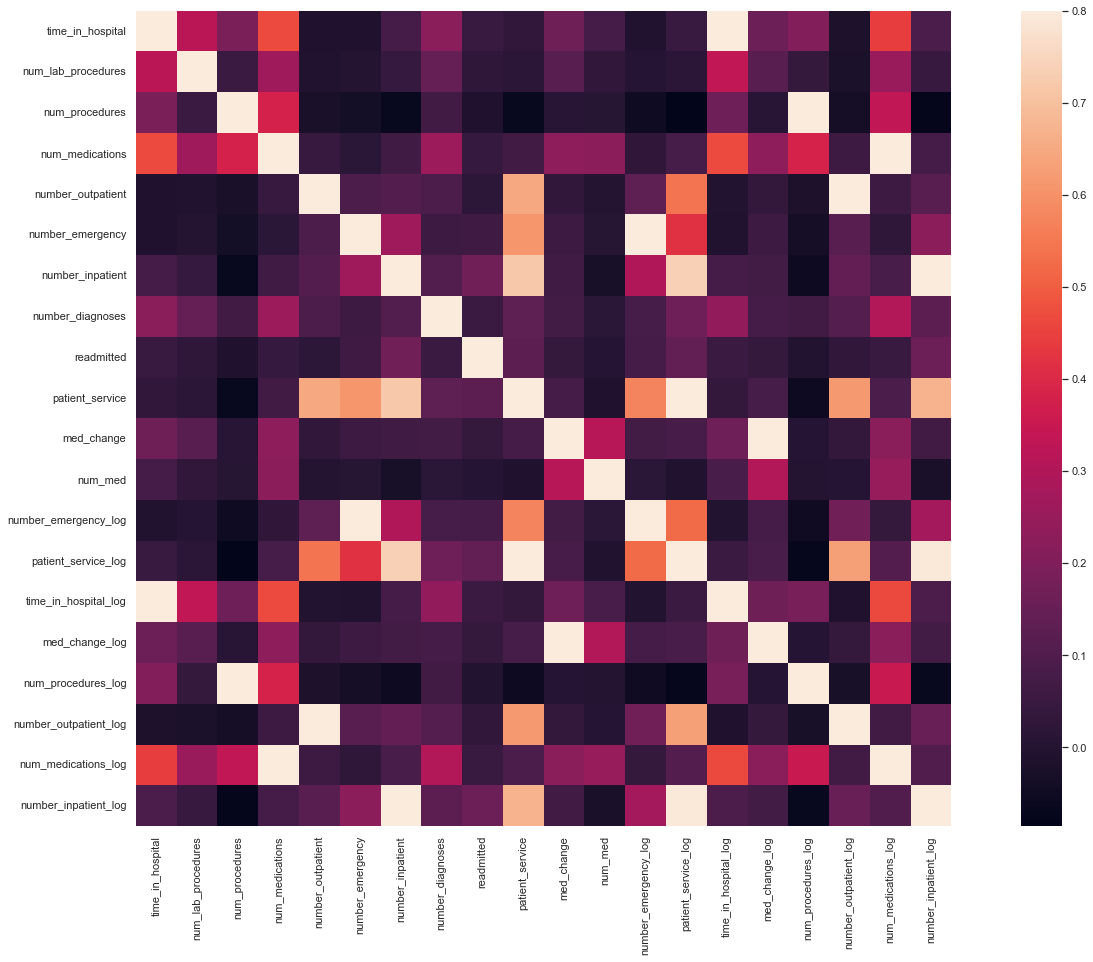

In [92]:
# Draw heatmap to plot the correlations
"""metformin-rosiglitazone is with all NAs"""
a = plt.subplots(figsize=(25, 15))
a = sns.heatmap(train_col, vmax=.8, square=True)

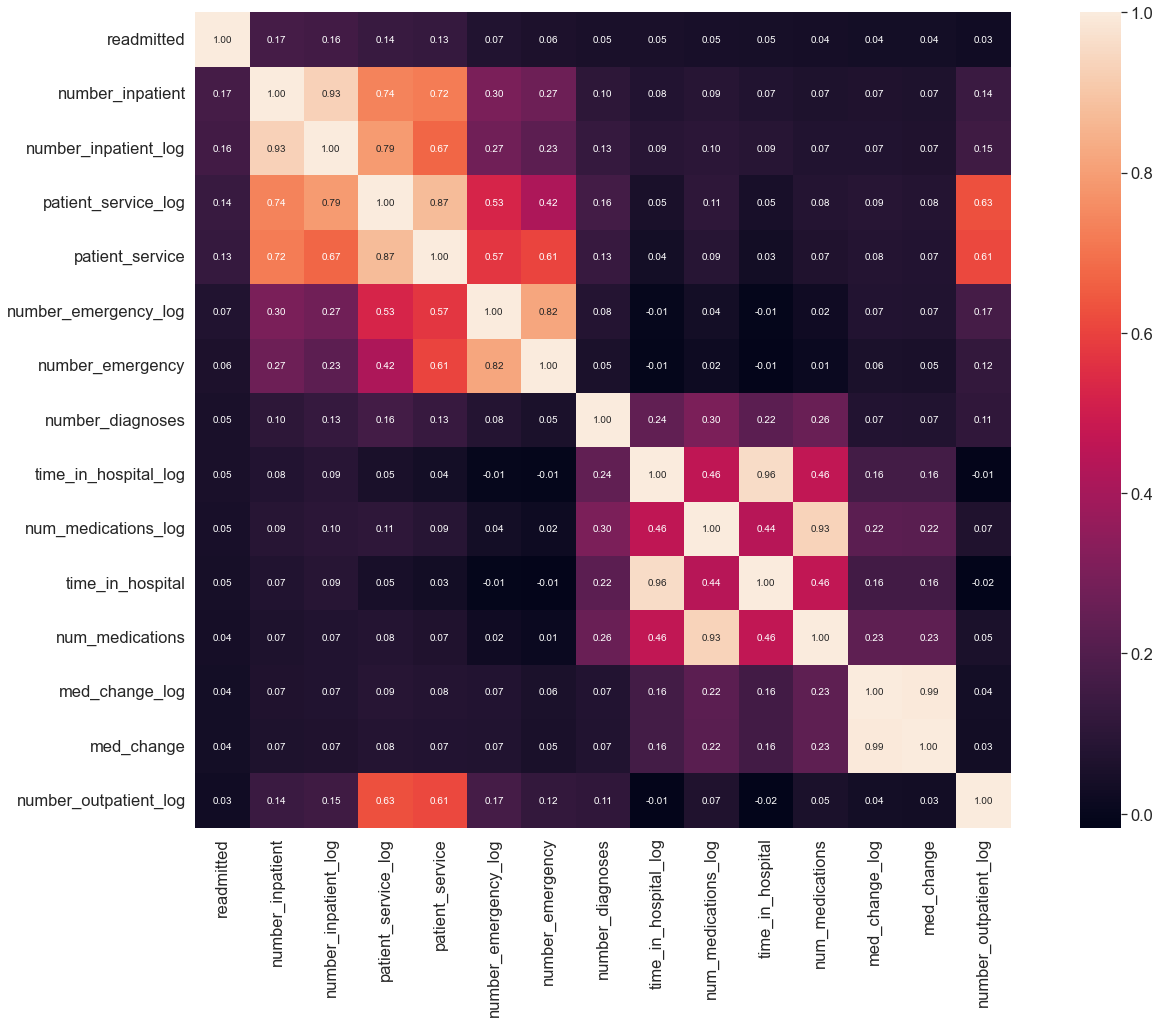

In [93]:
# find the top 15 correlated variables 
k = 15
cols = train_col.nlargest(k,'readmitted')['readmitted'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
hm = plt.subplots(figsize=(25, 15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [94]:
train.dtypes

race                         object
gender                       object
age                          object
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
time_in_hospital            float64
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses            float64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                    object
glyburide                    object
tolbutamide                 

In [95]:
train.diabetesMed = train.diabetesMed.astype('int64')
train.change = train.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
train[i] = train[i].astype('int64')

train.dtypes

race                         object
gender                       object
age                          object
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
time_in_hospital            float64
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses            float64
max_glu_serum                object
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
acetohexamide                 int64
glipizide                     int64
glyburide                     int64
tolbutamide                 

## Outlier

In [96]:
key=['num_med',
 'number_emergency',
 'num_lab_procedures',
 'patient_service',
 'time_in_hospital',
 'med_change',
 'num_procedures',
 'number_diagnoses',
 'number_outpatient',
 'num_medications',
 'number_inpatient']
train = train[(np.abs(sp.stats.zscore(train[key])) < 3).all(axis=1)]

In [97]:
train.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'patient_service', 'med_change', 'num_med', 'primary_diag',
       'secondary_diag', 'additional_diag', 'number_emergency_log',
       'patient_service_log', 'time_in_hospital_log', 'med_change_log',
 

In [98]:
for i in train.columns:
    df=train[i].value_counts()
    print(df)

1    68090
2    17275
3     1818
0     1346
4      590
Name: race, dtype: int64
0    48181
1    40938
Name: gender, dtype: int64
75    23003
65    19716
85    15188
55    15112
45     8352
35     3286
95     2467
25     1321
15      560
5       114
Name: age, dtype: int64
1    63365
3    16483
5     9261
4       10
Name: admission_type_id, dtype: int64
1     65653
2     18408
18     4287
7       537
28      127
10       93
19        8
27        4
20        2
Name: discharge_disposition_id, dtype: int64
9     56717
1     27147
4      5239
8        11
11        5
Name: admission_source_id, dtype: int64
-0.467585    16055
-0.803582    15559
-1.139580    12937
-0.131587    12456
 0.204411     8808
 0.540408     6515
 0.876406     5012
 1.212404     3713
 1.548401     2487
 1.884399     1927
 2.220397     1510
 2.556394     1169
 2.892392      971
Name: time_in_hospital, dtype: int64
-2.134345    2923
 0.004121    2524
 0.055037    2177
 0.105953    2092
-0.250459    1985
             ... 


In [99]:
train['primary_diag'] = train['primary_diag'].astype('int')
train_v = pd.get_dummies(train, columns=['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'primary_diag'], drop_first = True)

C:\Users\madara\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [100]:
nom_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'primary_diag' ]

In [101]:
num_cols = list(set(list(train._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['nateglinide',
 'num_procedures_log',
 'num_lab_procedures',
 'number_inpatient',
 'number_diagnoses',
 'time_in_hospital',
 'miglitol',
 'tolbutamide',
 'chlorpropamide',
 'number_emergency_log',
 'number_outpatient',
 'metformin-rosiglitazone',
 'glyburide',
 'num_med',
 'number_outpatient_log',
 'num_medications_log',
 'acetohexamide',
 'pioglitazone',
 'patient_service_log',
 'patient_service',
 'metformin-pioglitazone',
 'A1Cresult',
 'glimepiride',
 'number_emergency',
 'insulin',
 'time_in_hospital_log',
 'glimepiride-pioglitazone',
 'num_procedures',
 'diabetesMed',
 'med_change',
 'troglitazone',
 'glipizide-metformin',
 'tolazamide',
 'med_change_log',
 'number_inpatient_log',
 'glipizide',
 'rosiglitazone',
 'num_medications',
 'repaglinide',
 'acarbose',
 'glyburide-metformin',
 'primary_diag',
 'metformin']

In [102]:
# Append all columns with dummy variables 
nom_cols_new = []
for i in nom_cols:
    for j in train_v.columns:
        if i in j:
            nom_cols_new.append(j)

In [103]:
nom_cols_new

['race_1',
 'race_2',
 'race_3',
 'race_4',
 'gender_1',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_1',
 'max_glu_serum_99',
 'A1Cresult_1',
 'A1Cresult_99',
 'primary_diag_1',
 'primary_diag_2',
 'primary_diag_3',
 'primary_diag_4',
 'primary_diag_5',
 'primary_diag_6',
 'primary_diag_7',
 'primary_diag_8']

In [104]:
train_v.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'patient_service', 'med_change', 'num_med', 'secondary_diag',
       'additional_diag', 'number_emergency_log', 'patient_service_log',
       'time_in_hospital_log', 'med_change_log', 'num_procedures_log',
       'number_outpatient_log', 'num_medications_log', 'number_inpatient_log',
       'race_1', 'race_2', 'race_3', 'race_4', 'ge

In [105]:
# Create a feature set
feature_set= ['race_1','race_2','race_3','race_4','gender_1','age','admission_type_id_3',
       'admission_type_id_4','admission_type_id_5','discharge_disposition_id_2', 
'discharge_disposition_id_7','discharge_disposition_id_10','discharge_disposition_id_18','discharge_disposition_id_19',
        'discharge_disposition_id_20','discharge_disposition_id_27','discharge_disposition_id_28','admission_source_id_4', 'admission_source_id_8',
        'admission_source_id_9','admission_source_id_11','num_lab_procedures','number_diagnoses', 'max_glu_serum_1', 'max_glu_serum_99', 'A1Cresult_1', 'A1Cresult_99', 
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 
        'num_med', 'primary_diag_1','primary_diag_2','primary_diag_3','primary_diag_4','primary_diag_5','primary_diag_6','primary_diag_7','primary_diag_8',
        'number_emergency_log','patient_service_log', 'time_in_hospital_log', 'med_change_log',
       'num_procedures_log', 'number_outpatient_log', 'num_medications_log',
       'number_inpatient_log']

In [106]:
pd.set_option('display.max_rows', 500)

In [107]:
train_v.head(10).T

1         2         3         4         5   \
age                                15        25        35        45        55   
time_in_hospital            -0.467585 -0.803582 -0.803582  -1.13958 -0.467585   
num_lab_procedures           0.818775 -1.625187  0.055037  0.411448  -0.60687   
num_procedures              -0.784194  2.159864 -0.195382 -0.784194  2.748676   
num_medications              0.249085 -0.369407  0.001688 -0.987898  0.001688   
number_outpatient           -0.293251  1.277304 -0.293251 -0.293251 -0.293251   
number_emergency            -0.213584 -0.213584 -0.213584 -0.213584 -0.213584   
number_inpatient            -0.504065  0.283123 -0.504065 -0.504065 -0.504065   
diag_1                            276       648         8       197       414   
diag_2                         250.01       250    250.43       157       411   
diag_3                            255       V27       403       250       250   
number_diagnoses             0.815034 -0.738699 -0.220788  -1.25661  0.815034   
metformin                           0         0         0         0         0   
repaglinide                         0         0         0         0         0   
nateglinide                         0         0         0         0         0   
chlorpropamide                      0         0         0         0         0   
glimepiride                         0         0         0         0         0   
acetohexamide                       0         0         0         0         0   
glipizide                           0         1         0         1         0   
glyburide                           0         0         0         0         0   
tolbutamide                         0         0         0         0         0   
pioglitazone                        0         0         0         0         0   
rosiglitazone                       0         0         0         0         0   
acarbose                            0         0         0         0         0   
miglitol                            0         0         0         0         0   
troglitazone                        0         0         0         0         0   
tolazamide                          0         0         0         0         0   
insulin                             1         0         1         1         1   
glyburide-metformin                 0         0         0         0         0   
glipizide-metformin                 0         0         0         0         0   
glimepiride-pioglitazone            0         0         0         0         0   
metformin-rosiglitazone             0         0         0         0         0   
metformin-pioglitazone              0         0         0         0         0   
change                              1         0         1         1         0   
diabetesMed                         1         1         1         1         1   
readmitted                          0         0         0         0         0   
patient_service             -0.526326  0.772577 -0.526326 -0.526326 -0.526326   
med_change                   1.456929 -0.590221  1.456929 -0.590221 -0.590221   
num_med                     -0.198754 -0.198754 -0.198754  0.885793 -0.198754   
secondary_diag                    4.0       4.0       4.0       8.0       1.0   
additional_diag                   0.0       0.0       1.0       4.0       4.0   
number_emergency_log              0.0       0.0       0.0       0.0       0.0   
patient_service_log               0.0  1.386294       0.0       0.0       0.0   
time_in_hospital_log         1.386294  1.098612  1.098612  0.693147  1.386294   
med_change_log               0.693147       0.0  0.693147       0.0       0.0   
num_procedures_log                0.0  1.791759  0.693147       0.0   1.94591   
number_outpatient_log             0.0  1.098612       0.0       0.0       0.0   
num_medications_log          2.944439  2.639057  2.833213  2.197225  2.833213   
number_inpatient_log              0.0  0.693147       0.0       0.

In [108]:
train_v.to_csv('./modified_diabetes1205_V2.csv',index=None)

In [109]:
train_v = pd.read_csv('./modified_diabetes1205_V2.csv')

In [110]:
train_v.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'patient_service', 'med_change', 'num_med', 'secondary_diag',
       'additional_diag', 'number_emergency_log', 'patient_service_log',
       'time_in_hospital_log', 'med_change_log', 'num_procedures_log',
       'number_outpatient_log', 'num_medications_log', 'number_inpatient_log',
       'race_1', 'race_2', 'race_3', 'race_4', 'ge

# Modeling 

In [111]:
train_input = train_v[feature_set]
train_output = train_v['readmitted']

Class 0: 79512
Class 1: 9607
Proportion: 8.28 : 1


<AxesSubplot:title={'center':'Count (target)'}>

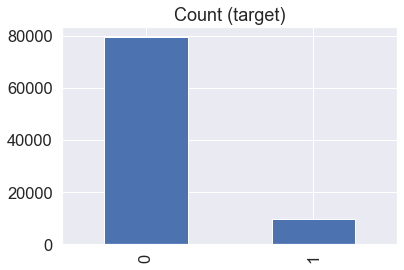

In [112]:
# Check the class for the outcome variable 
target_count=train_v['readmitted'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

## Logistic Regression-Benchmark  

In [113]:
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from xgboost.sklearn import XGBClassifier 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

sns.set(style='white', context='notebook', palette='deep')

In [114]:
# Split the training and testing dataset 
x_train, x_test, y_train, y_test= model_selection.train_test_split(train_input, train_output, random_state = 0, test_size=0.1)

Class 0: 79512
Class 1: 9607
Proportion: 8.28 : 1


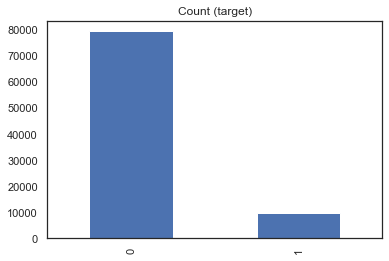

In [115]:
import numpy as np
import pandas as pd

target_count = train_output.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [116]:
LogR = LogisticRegression(fit_intercept=True, penalty='l1',solver='liblinear',random_state = 0).fit(x_train,y_train)

In [117]:
y_pred = LogR.predict(x_test)

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred)))

Accuracy is 0.89
Precision is 0.00
Recall is 0.00


In [119]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7943
           1       0.00      0.00      0.00       969

    accuracy                           0.89      8912
   macro avg       0.45      0.50      0.47      8912
weighted avg       0.79      0.89      0.84      8912



# knn benchmark

In [120]:
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(x_train, y_train)

y_pred=knn.predict(x_test)

In [121]:

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7943
           1       0.14      0.01      0.02       969

    accuracy                           0.89      8912
   macro avg       0.52      0.50      0.48      8912
weighted avg       0.81      0.89      0.84      8912



In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred)))

Accuracy is 0.89
Precision is 0.14
Recall is 0.01


## Class Imbalance 

In [123]:
# Class Imbalance Processing: Using re-sampling method
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 79512, 1: 9607})
New dataset shape Counter({0: 79512, 1: 79512})


In [124]:
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))

In [125]:
pd.concat([pd.DataFrame(train_input_new), pd.DataFrame(train_output_new)],axis=1).to_csv('./smote_data.csv',header=None)

In [126]:
# Again,split the training and testing dataset 
x_train_new, x_test_new, y_train_new, y_test_new= model_selection.train_test_split(train_input_new, train_output_new, random_state = 0, test_size=0.1)

# knn benchmark after balancing

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(x_train_new, y_train_new)

KNeighborsClassifier(n_neighbors=7)

In [129]:
y_test_predict=knn.predict(x_test_new)

In [132]:

print(metrics.classification_report(y_test_new,y_test_predict))

              precision    recall  f1-score   support

           0       0.98      0.58      0.73      7836
           1       0.71      0.99      0.82      8067

    accuracy                           0.79     15903
   macro avg       0.84      0.78      0.78     15903
weighted avg       0.84      0.79      0.78     15903



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test_new, y_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test_new, y_pred)))

In [ ]:
accuracy_knn = accuracy_score(y_test_new, y_test_predict)
precision_knn = precision_score(y_test_new, y_test_predict)
recall_knn = recall_score(y_test_new, y_test_predict)
auc_knn = roc_auc_score(y_test_new,knn.predict_proba(x_test_new)[:,1])

In [137]:
print(accuracy_knn,auc_knn)

0.7857636923850846 0.9262933713710715


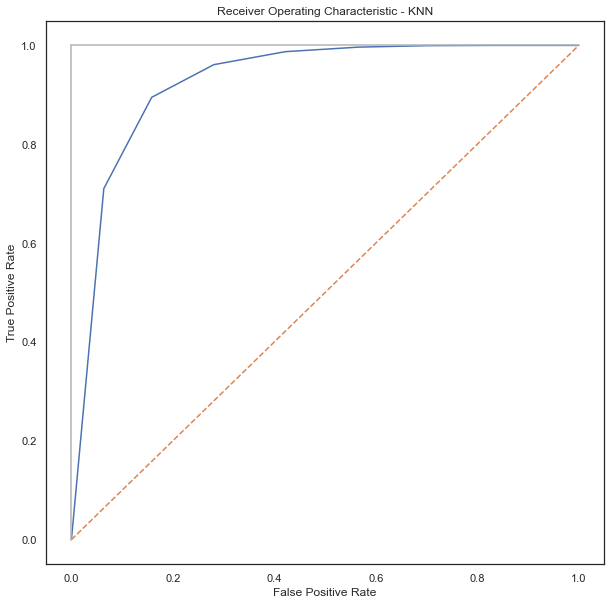

<Figure size 432x288 with 0 Axes>

In [133]:
from sklearn.metrics import roc_curve,auc
score=knn.predict_proba(x_test_new)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test_new,score)
                                                                  
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.savefig('knnroc.eps', format='eps')

## Decision Tree

### Decision Tree-Entropy 

In [136]:
feature_set_dec = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log', 
                 'number_emergency_log', 'number_inpatient_log', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                 'tolazamide', 'insulin', 'glyburide-metformin',
                 'race_1', 'race_2', 'race_3', 
                 'race_4', 'gender_1', 
                 'admission_source_id_4', 'admission_source_id_8', 'admission_source_id_9','admission_source_id_11', 
                 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 
                 'max_glu_serum_1', 'max_glu_serum_99', 'A1Cresult_1', 'A1Cresult_99', 
                 'primary_diag_1','primary_diag_2','primary_diag_3','primary_diag_4','primary_diag_5','primary_diag_6','primary_diag_7','primary_diag_8']

In [137]:
train_input = train_v[feature_set_dec]
train_output = train_v['readmitted']
train_v['readmitted'].value_counts()

0    79512
1     9607
Name: readmitted, dtype: int64

In [138]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 79512, 1: 9607})
New dataset shape Counter({0: 79512, 1: 79512})


In [139]:
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dte, x_train_new, y_train_new, cv=10))))
dte.fit(x_train_new, y_train_new)
print("Dev Set score: {:.2%}".format(dte.score(x_test_new, y_test_new)))

Cross Validation score: 88.36%
Dev Set score: 88.33%


In [140]:
y_test_predict = dte.predict(x_test_new)

In [141]:
print(metrics.classification_report(y_test_new,y_test_predict))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     15685
           1       0.91      0.86      0.88     16120

    accuracy                           0.88     31805
   macro avg       0.88      0.88      0.88     31805
weighted avg       0.88      0.88      0.88     31805



In [142]:
# Calculate Accuracy, precision, reacall and AUC with classificaiton-entropy
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, dte.predict_proba(x_test_new)[:,1])))

accuracy_dte = accuracy_score(y_test_new, y_test_predict)
precision_dte = precision_score(y_test_new, y_test_predict)
recall_dte = recall_score(y_test_new, y_test_predict)
auc_dte = roc_auc_score(y_test_new, dte.predict_proba(x_test_new)[:,1])

Accuracy is 0.88
Precision is 0.91
Recall is 0.86
AUC is 0.92


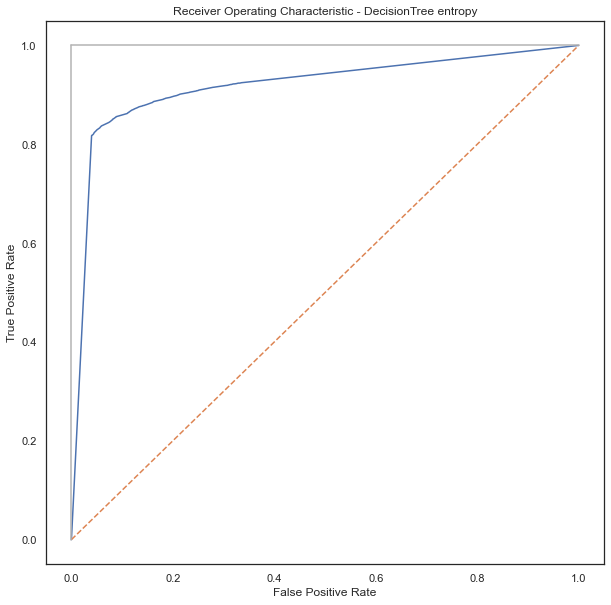

In [143]:
from sklearn.metrics import roc_curve,auc
score=dte.predict_proba(x_test_new)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test_new,score)
                                                                  
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree entropy')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree-Gini 

In [144]:
# Calculate
from sklearn.tree import DecisionTreeClassifier
dtg = DecisionTreeClassifier(max_depth=28, criterion = "gini", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dte, x_train_new, y_train_new, cv=10))))
dtg=dtg.fit(x_train_new, y_train_new)
print("Dev Set score: {:.2%}".format(dte.score(x_test_new, y_test_new)))

Cross Validation score: 88.35%
Dev Set score: 88.33%


In [145]:
y_test_predict = dtg.predict(x_test_new)

In [146]:
pd.crosstab(pd.Series(y_test_new, name = 'Actual'), pd.Series(y_test_predict, name = 'Predict'), margins = True)

Predict     0     1   All
Actual                   
0        2880  2696  5576
1         375   322   697
All      3255  3018  6273

In [147]:
print(metrics.classification_report(y_test_new,y_test_predict))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     15685
           1       0.91      0.86      0.88     16120

    accuracy                           0.89     31805
   macro avg       0.89      0.89      0.89     31805
weighted avg       0.89      0.89      0.89     31805



In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, dtg.predict_proba(x_test_new)[:,1])))

accuracy_dtg = accuracy_score(y_test_new, y_test_predict)
precision_dtg = precision_score(y_test_new, y_test_predict)
recall_dtg = recall_score(y_test_new, y_test_predict)
auc_dtg = roc_auc_score(y_test_new, y_test_predict)

Accuracy is 0.89
Precision is 0.91
Recall is 0.86
AUC is 0.92


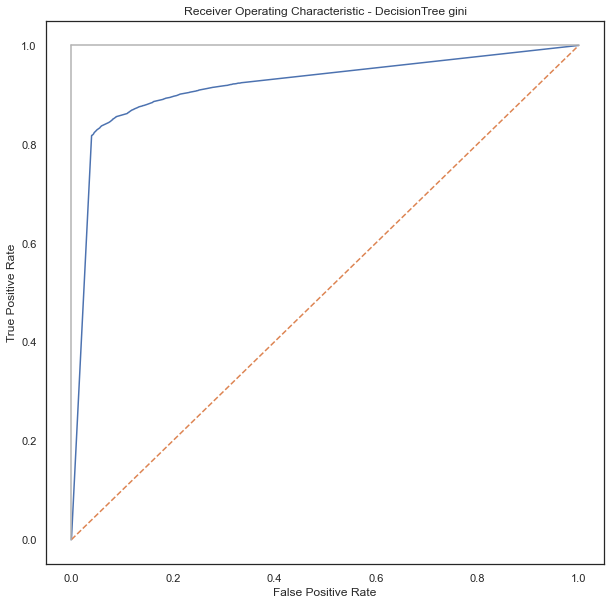

In [149]:
from sklearn.metrics import roc_curve,auc
score=dte.predict_proba(x_test_new)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test_new,score)
                                                                  
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree gini')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

                       Feature  Importance
25                    gender_1    0.007378
30  discharge_disposition_id_2    0.008346
5         number_emergency_log    0.013593
0                          age    0.022690
4        number_outpatient_log    0.029287
2               num_procedures    0.049930
7             number_diagnoses    0.051793
3              num_medications    0.062054
6         number_inpatient_log    0.272154
1             time_in_hospital    0.384891


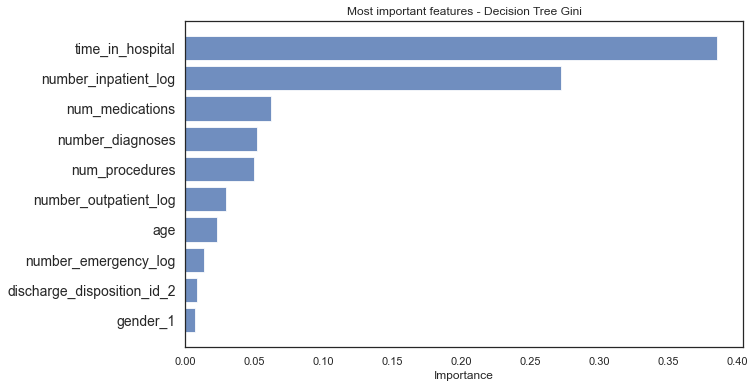

In [166]:
# Create list of top most features based on importance
feature_names = x_train_new.columns
feature_imports = dte.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree Gini')
plt.show()

                  Feature  Importance
19                insulin    0.008947
25               gender_1    0.009217
5    number_emergency_log    0.014704
0                     age    0.027828
4   number_outpatient_log    0.028232
2          num_procedures    0.051253
7        number_diagnoses    0.054002
3         num_medications    0.073224
6    number_inpatient_log    0.262694
1        time_in_hospital    0.351306


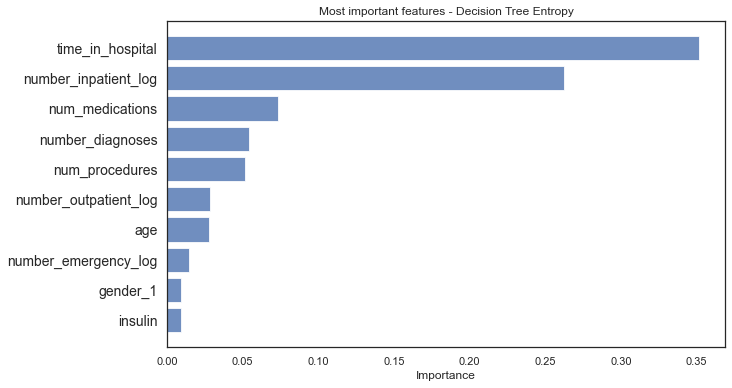

In [167]:
# Create list of top most features based on importance

dte = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dte=dte.fit(x_train_new, y_train_new)
feature_names = x_train_new.columns
feature_imports = dte.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree Entropy')
plt.show()

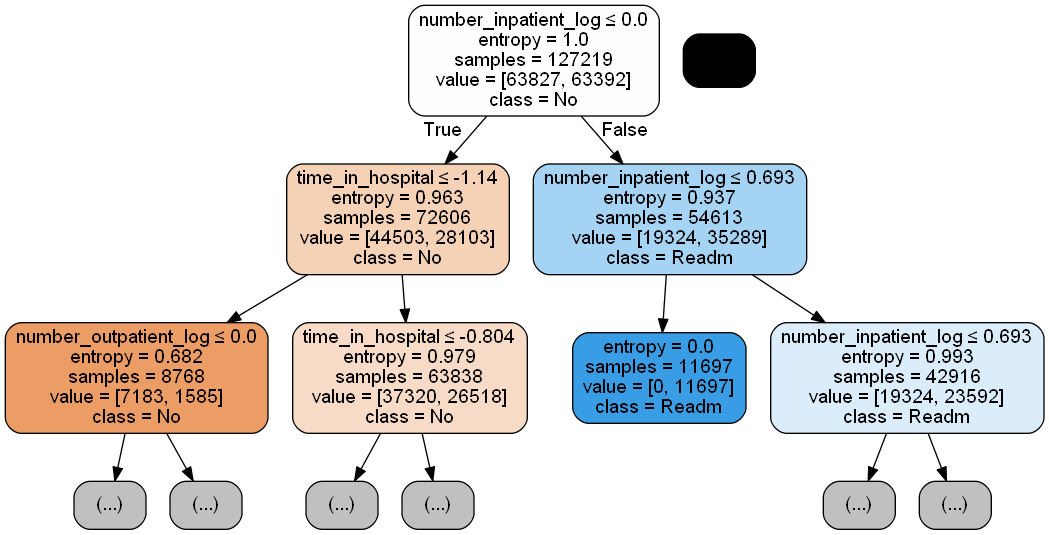

In [168]:
import graphviz
from IPython.display import Image
import pydotplus
from sklearn import tree
dot_dt_q2 = tree.export_graphviz(dte, out_file="dt_q2.dot", feature_names=x_train_new.columns, max_depth=2,
                                 class_names=["No","Readm"], filled=True, rounded=True, special_characters=True)
graph_dt_q2 = pydotplus.graph_from_dot_file('dt_q2.dot')
Image(graph_dt_q2.create_png())

## Random Forest Entropy

In [150]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, x_train_new, y_train_new, cv=10))))
forrest.fit(x_train_new, y_train_new)
print("Dev Set score: {:.2%}".format(forrest.score(x_test_new, y_test_new)))

Cross Validation score: 88.86%
Dev Set score: 88.86%


In [151]:
y_test_predict = forrest.predict(x_test_new)

In [152]:
print(metrics.classification_report(y_test_new,y_test_predict))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     15685
           1       0.92      0.85      0.89     16120

    accuracy                           0.89     31805
   macro avg       0.89      0.89      0.89     31805
weighted avg       0.89      0.89      0.89     31805



In [153]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, forrest.predict_proba(x_test_new)[:,1])))

accuracy_forreste = accuracy_score(y_test_new, y_test_predict)
precision_forreste = precision_score(y_test_new, y_test_predict)
recall_forreste = recall_score(y_test_new, y_test_predict)
auc_forreste = roc_auc_score(y_test_new, forrest.predict_proba(x_test_new)[:,1])

Accuracy is 0.89
Precision is 0.92
Recall is 0.85
AUC is 0.95


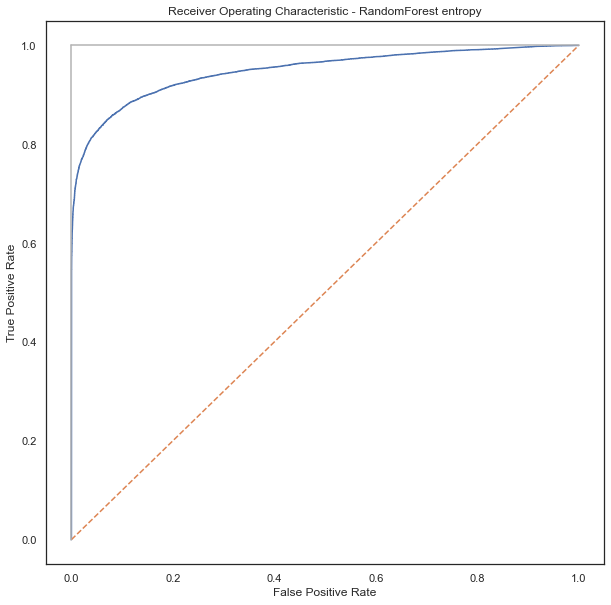

In [154]:
from sklearn.metrics import roc_curve,auc
score=forrest.predict_proba(x_test_new)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test_new,score)
                                                                  
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForest entropy')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest Gini

In [155]:
forrestg = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, x_train_new, y_train_new, cv=10))))
forrestg.fit(x_train_new, y_train_new)
print("Dev Set score: {:.2%}".format(forrestg.score(x_test_new, y_test_new)))

Cross Validation score: 88.97%
Dev Set score: 89.23%


In [156]:
y_test_predict = forrestg.predict(x_test_new)

In [157]:
print(metrics.classification_report(y_test_new,y_test_predict))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     15685
           1       0.93      0.85      0.89     16120

    accuracy                           0.89     31805
   macro avg       0.90      0.89      0.89     31805
weighted avg       0.90      0.89      0.89     31805



In [158]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, forrestg.predict_proba(x_test_new)[:,1])))

accuracy_forrestg = accuracy_score(y_test_new, y_test_predict)
precision_forrestg = precision_score(y_test_new, y_test_predict)
recall_forrestg = recall_score(y_test_new, y_test_predict)
auc_forrestg = roc_auc_score(y_test_new,forrestg.predict_proba(x_test_new)[:,1])

Accuracy is 0.89
Precision is 0.93
Recall is 0.85
AUC is 0.95


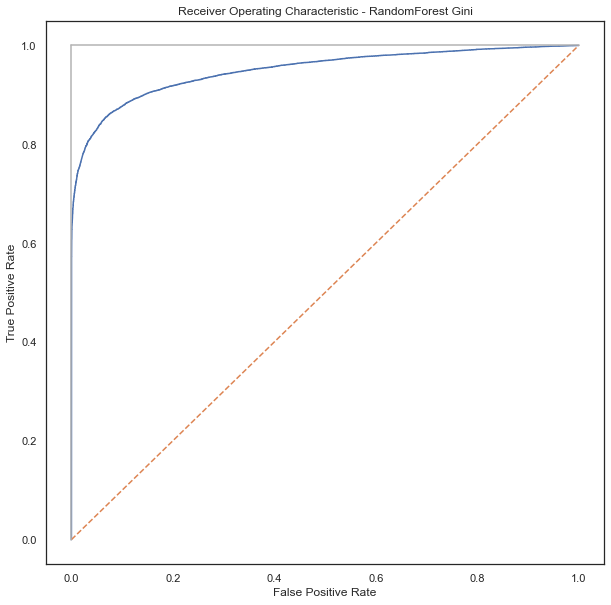

In [159]:
from sklearn.metrics import roc_curve,auc
score=forrestg.predict_proba(x_test_new)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test_new,score)
                                                                  
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForest Gini')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

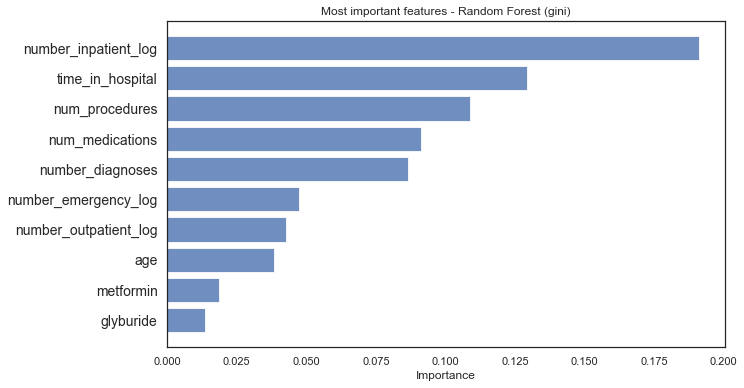

In [160]:
# Create list of top most features based on importance
feature_names = x_train_new.columns
feature_imports = forrest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest (gini)')
plt.show()

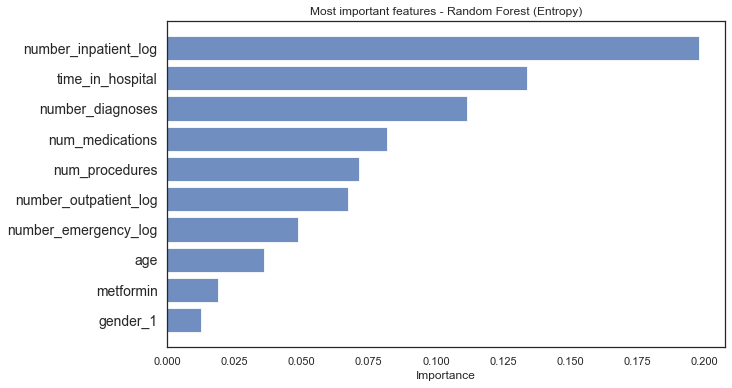

In [161]:
forrest = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "entropy", min_samples_split=10)
forrest.fit(x_train_new, y_train_new)
feature_names = x_train_new.columns
feature_imports = forrest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest (Entropy)')
plt.show()

# lightgbm

In [162]:
import lightgbm as lgb

In [163]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

In [164]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)

In [165]:
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(model, x_train_new, y_train_new, cv=10))))
model.fit(x_train_new,y_train_new,eval_set=[(x_test_new,y_test_new),(x_train_new,y_train_new)],
          verbose=20,eval_metric='logloss')

print("Dev Set score: {:.2%}".format(model.score(x_test_new, y_test_new)))

Cross Validation score: 93.28%


C:\Users\madara\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.365868	valid_0's binary_logloss: 0.367256
[40]	training's binary_logloss: 0.273229	valid_0's binary_logloss: 0.275966
[60]	training's binary_logloss: 0.239871	valid_0's binary_logloss: 0.243294
[80]	training's binary_logloss: 0.22141	valid_0's binary_logloss: 0.225505
[100]	training's binary_logloss: 0.212476	valid_0's binary_logloss: 0.21757
Dev Set score: 93.16%


In [166]:
print('Training accuracy {:.4f}'.format(model.score(x_train_new,y_train_new)))
print('Testing accuracy {:.4f}'.format(model.score(x_test_new,y_test_new)))

Training accuracy 0.9333
Testing accuracy 0.9316


Text(0.5, 1.0, 'Feature Importance')

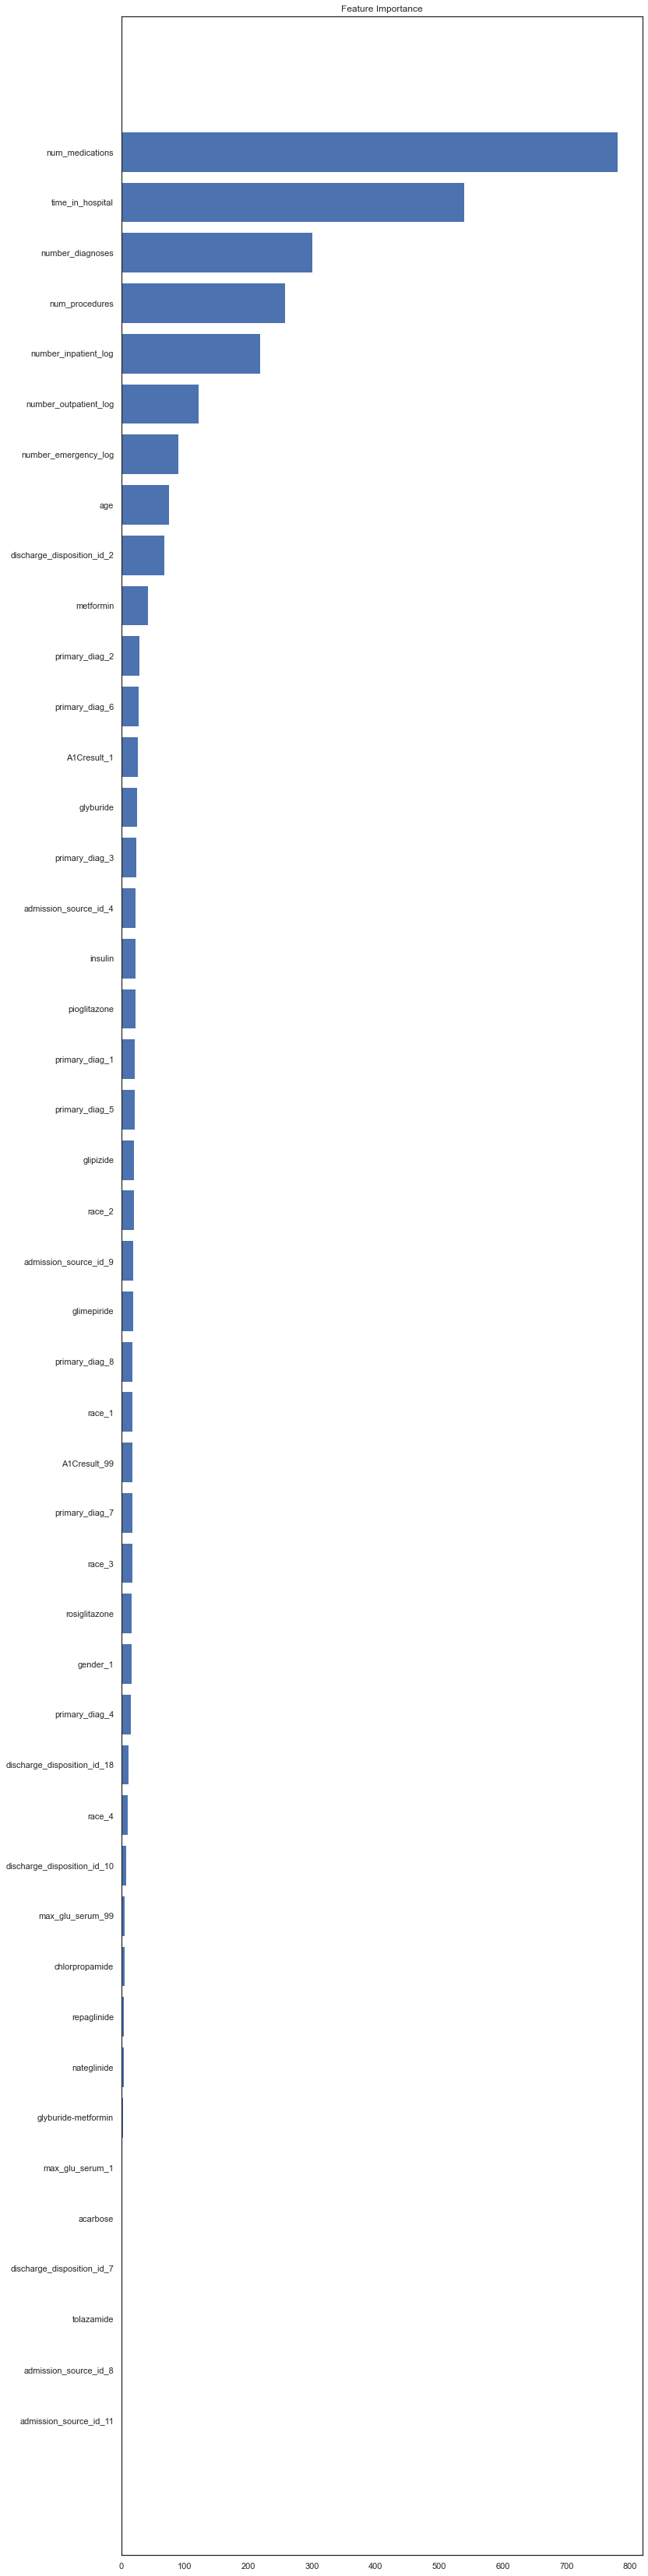

In [167]:

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 60))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test_new.columns)[sorted_idx])
plt.title('Feature Importance')


In [168]:
from sklearn import metrics
print(metrics.classification_report(y_test_new,model.predict(x_test_new)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     15685
           1       1.00      0.87      0.93     16120

    accuracy                           0.93     31805
   macro avg       0.94      0.93      0.93     31805
weighted avg       0.94      0.93      0.93     31805



In [169]:
y_test_predict=model.predict(x_test_new)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, model.predict_proba(x_test_new)[:,1])))

accuracy_lite = accuracy_score(y_test_new, y_test_predict)
precision_lite = precision_score(y_test_new, y_test_predict)
recall_lite = recall_score(y_test_new, y_test_predict)
auc_lite = roc_auc_score(y_test_new, model.predict_proba(x_test_new)[:,1])

Accuracy is 0.93
Precision is 1.00
Recall is 0.87
AUC is 0.95


C:\Users\madara\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


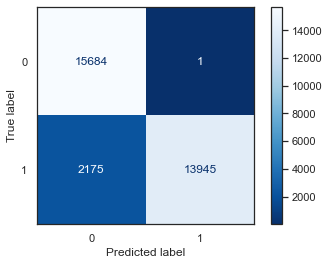

In [170]:
metrics.plot_confusion_matrix(model,x_test_new,y_test_new,cmap='Blues_r')

<AxesSubplot:>

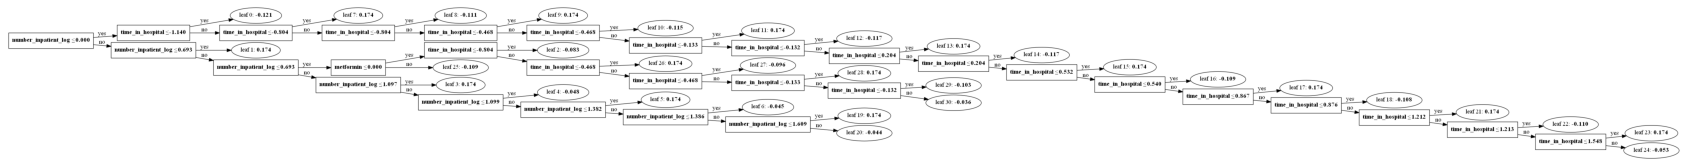

In [171]:
lgb.plot_tree(model,figsize=(30,40))

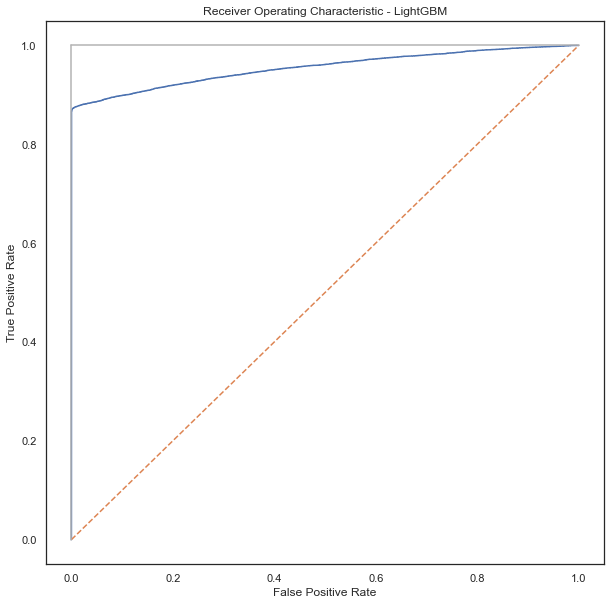

In [172]:
from sklearn.metrics import roc_curve,auc
score=model.predict_proba(x_test_new)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test_new,score)
                                                                  
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - LightGBM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# catboost

In [173]:
import catboost as cb

C:\Users\madara\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [174]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(x_train_new, y_train_new,  
        eval_set=(x_test_new, y_test_new), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [175]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=10,
#     verbose=5,
)

clf.fit(x_train_new, y_train_new,  
        eval_set=(x_test_new, y_test_new),\
)

Learning rate set to 0.5
0:	learn: 0.5527405	test: 0.5533408	best: 0.5533408 (0)	total: 24.3ms	remaining: 219ms
1:	learn: 0.4591281	test: 0.4620522	best: 0.4620522 (1)	total: 47.8ms	remaining: 191ms
2:	learn: 0.4090387	test: 0.4120564	best: 0.4120564 (2)	total: 80.1ms	remaining: 187ms
3:	learn: 0.3758300	test: 0.3793629	best: 0.3793629 (3)	total: 113ms	remaining: 170ms
4:	learn: 0.3481303	test: 0.3519505	best: 0.3519505 (4)	total: 149ms	remaining: 149ms
5:	learn: 0.3357385	test: 0.3400491	best: 0.3400491 (5)	total: 174ms	remaining: 116ms
6:	learn: 0.3201104	test: 0.3251485	best: 0.3251485 (6)	total: 214ms	remaining: 91.6ms
7:	learn: 0.3161892	test: 0.3220771	best: 0.3220771 (7)	total: 246ms	remaining: 61.6ms
8:	learn: 0.2971589	test: 0.3019779	best: 0.3019779 (8)	total: 277ms	remaining: 30.8ms
9:	learn: 0.2872331	test: 0.2909809	best: 0.2909809 (9)	total: 301ms	remaining: 0us

bestTest = 0.2909809016
bestIteration = 9



In [176]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)

#print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(clf, x_train_new, y_train_new, cv=10))))


clf.fit(
    x_train_new, y_train_new,
    eval_set=(x_test_new, y_test_new),
    verbose=False,
    plot=True
)

print("Dev Set score: {:.2%}".format(clf.score(x_test_new, y_test_new)))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Dev Set score: 93.38%


In [177]:
print('Training accuracy {:.4f}'.format(clf.score(x_train_new,y_train_new)))
print('Testing accuracy {:.4f}'.format(clf.score(x_test_new,y_test_new)))

Training accuracy 0.9354
Testing accuracy 0.9338


In [178]:
mod=clf.feature_importances_

Text(0.5, 1.0, 'Feature Importance')

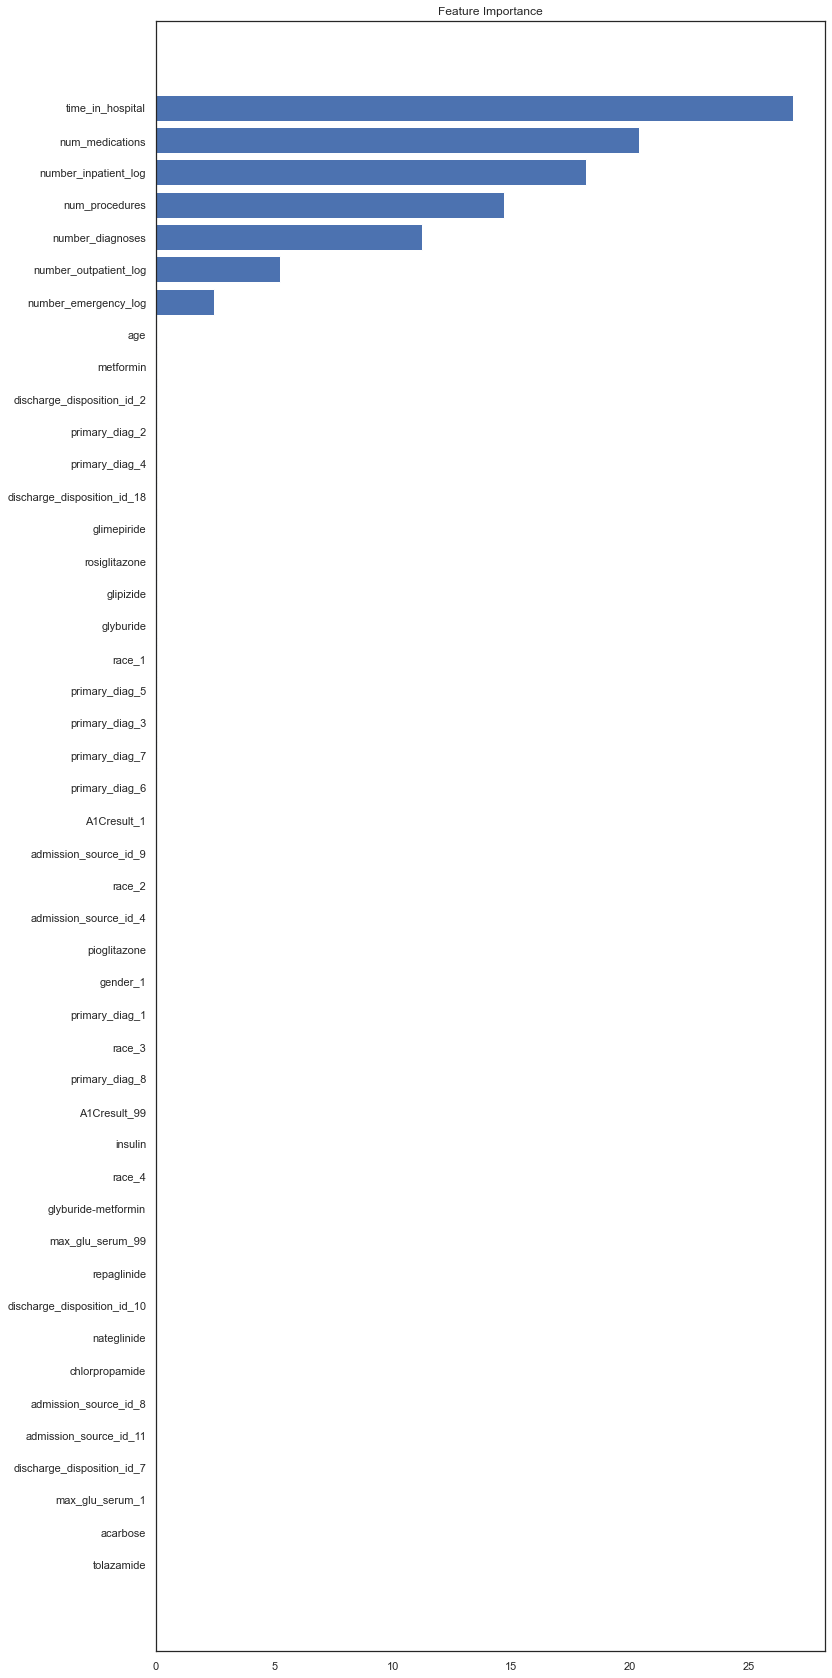

In [179]:

feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 30))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test_new.columns)[sorted_idx])
plt.title('Feature Importance')


In [180]:
from sklearn import metrics
print(metrics.classification_report(y_test_new,clf.predict(x_test_new)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     15685
           1       1.00      0.87      0.93     16120

    accuracy                           0.93     31805
   macro avg       0.94      0.93      0.93     31805
weighted avg       0.94      0.93      0.93     31805



In [181]:
y_test_predict=clf.predict(x_test_new)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test_new,clf.predict_proba(x_test_new)[:,1] )))

accuracy_cat = accuracy_score(y_test_new, y_test_predict)
precision_cat = precision_score(y_test_new, y_test_predict)
recall_cat = recall_score(y_test_new, y_test_predict)
auc_cat = roc_auc_score(y_test_new, clf.predict_proba(x_test_new)[:,1])

Accuracy is 0.93
Precision is 1.00
Recall is 0.87
AUC is 0.95


C:\Users\madara\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


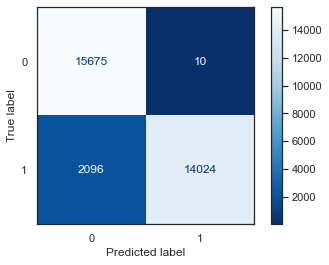

In [182]:
metrics.plot_confusion_matrix(clf,x_test_new,y_test_new,cmap='Blues_r')

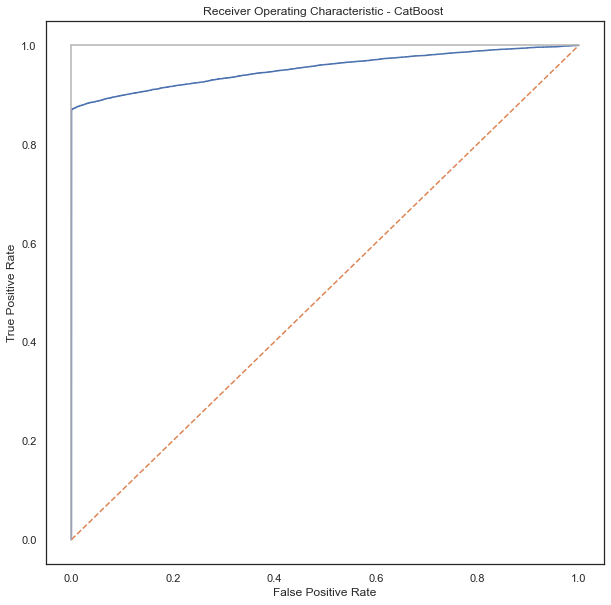

In [183]:
from sklearn.metrics import roc_curve,auc
score=clf.predict_proba(x_test_new)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test_new,score)
                                                                  
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - CatBoost ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model comparisons

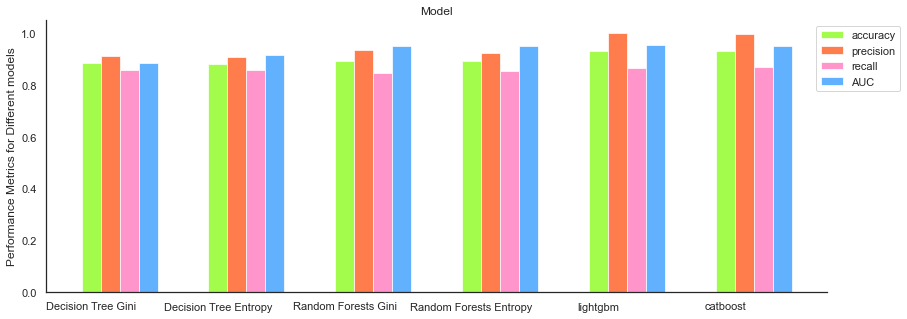

In [216]:
# plotting the accuracy for training and test
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = [ 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy', 'LightGBM','Catboost']
values = [accuracy_dtg, accuracy_dte, accuracy_forrestg, accuracy_forreste,accuracy_lite,accuracy_cat]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'lawngreen', label= 'accuracy')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy', 'lightgbm','catboost']
values = [precision_dtg, precision_dte, precision_forrestg, precision_forreste,precision_lite,precision_cat]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'orangered', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy', 'lightgbm','catboost']
values = [recall_dtg, recall_dte, recall_forrestg, recall_forreste, recall_lite,recall_cat]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'hotpink', label = 'recall')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy','lightgbm','catboost']
values = [auc_dtg, auc_dte, auc_forrestg, auc_forreste,auc_lite,auc_cat]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'dodgerblue', label = 'AUC')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc='upper right',bbox_to_anchor=(1.1,1))

#plt.show()
plt.savefig("1performance.jpg")